# visualize distributions within each cluster

In [7]:
import os, sys, shutil
import pathlib
import glob as glob
import numpy as np
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from IPython.display import display

In [8]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None
pd.options.display.precision = 1
pd.options.display.float_format = '{:.1f}'.format

In [9]:
base_path = os.path.dirname(os.path.abspath("__file__")).strip('notebooks')
#doublebase_path = os.path.join(base_path, "pdb", "motif", "cluster", "doublebase")
triplebase_path = os.path.join(base_path, "pdb", "motif", "cluster", "triplebase")

In [10]:
seqs = glob.glob(triplebase_path + "/*")
#seqs

/Users/takabak/work/rna_bgsu/pdb/motif/cluster/triplebase/AGG


0   1   2   3    4   5   6   7   8   9   10  11  12  13  14  15  \
# of samples 2.0 2.0 4.0 2.0 24.0 2.0 4.0 4.0 3.0 2.0 1.0 8.0 2.0 2.0 2.0 1.0   
Avg          2.9 2.1 2.4 2.3  1.2 2.9 3.3 2.9 0.5 0.1 0.0 2.3 2.6 2.3 0.2 0.0   
Std          2.9 2.1 1.6 2.3  0.4 2.9 2.0 1.7 0.5 0.1 0.0 1.5 2.6 2.3 0.2 0.0   
Max          5.7 4.1 4.4 4.6  2.4 5.9 5.1 4.3 1.1 0.2 0.0 4.0 5.3 4.6 0.5 0.0   
Min          0.0 0.0 0.0 0.0  0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0   

              16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  \
# of samples 4.0 1.0 5.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0   
Avg          2.9 0.0 0.8 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0   
Std          1.7 0.0 0.7 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0   
Max          4.3 0.0 1.7 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0   
Min          0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0   

              32  33  34  35  36  37  38  
# of samples 1.0 1.0 5.0 1.0 1.0 1.0 1.0  
Avg          0.0 0.0 0.9 0.0 0.0 0.0 0.0  
Std          0.0 0.0 0.5 0.0 0.0 0.0 0.0  
Max          0.0 0.0 1.2 0.0 0.0 0.0 0.0  
Min          0.0 0.0 0.0 0.0 0.0 0.0 0.0

<Figure size 432x288 with 0 Axes>

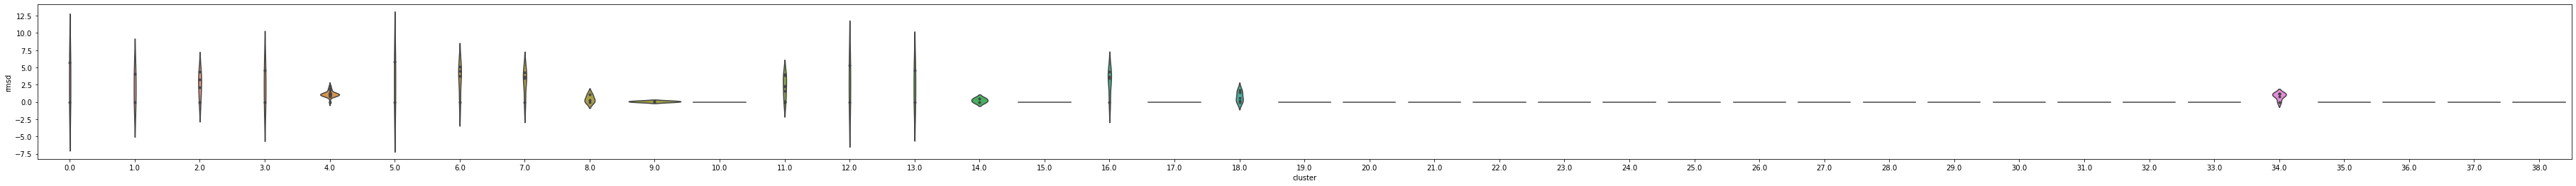

/Users/takabak/work/rna_bgsu/pdb/motif/cluster/triplebase/CGC


0   1   2   3   4    5   6    7   8   9   10  11  12  13   14  \
# of samples 2.0 2.0 8.0 3.0 5.0 90.0 2.0 10.0 4.0 3.0 5.0 1.0 9.0 4.0 12.0   
Avg          2.9 2.8 5.4 3.2 3.6  2.3 1.3  1.6 2.9 1.0 1.4 0.0 1.3 0.2  1.1   
Std          2.9 2.8 2.1 2.3 2.1  1.9 1.3  2.2 1.7 1.3 1.6 0.0 1.4 0.1  1.0   
Max          5.8 5.6 6.9 5.0 5.8  6.1 2.7  5.4 4.1 2.8 4.3 0.0 5.1 0.3  4.3   
Min          0.0 0.0 0.0 0.0 0.0  0.0 0.0  0.0 0.0 0.0 0.0 0.0 0.0 0.0  0.0   

              15  16  17  18  
# of samples 1.0 3.0 1.0 1.0  
Avg          0.0 2.0 0.0 0.0  
Std          0.0 2.7 0.0 0.0  
Max          0.0 5.7 0.0 0.0  
Min          0.0 0.0 0.0 0.0

<Figure size 432x288 with 0 Axes>

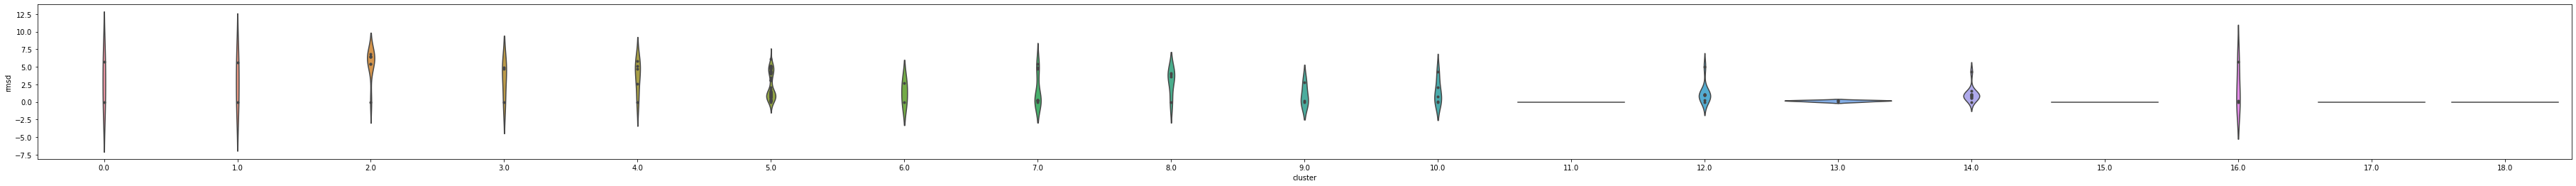

/Users/takabak/work/rna_bgsu/pdb/motif/cluster/triplebase/GAG


0   1   2   3    4   5   6   7   8   9   10  11  12  13  14  15  \
# of samples 2.0 4.0 2.0 4.0 69.0 6.0 4.0 5.0 3.0 3.0 8.0 7.0 9.0 5.0 2.0 7.0   
Avg          2.5 3.1 1.6 3.5  1.6 3.4 2.3 3.1 2.2 3.0 4.0 1.2 1.4 2.7 1.8 0.2   
Std          2.5 1.8 1.6 2.1  1.2 2.2 1.4 1.8 1.7 2.2 2.2 1.4 1.8 1.4 1.8 0.4   
Max          5.0 4.3 3.2 5.1  4.3 5.2 3.4 5.3 4.1 5.0 5.4 4.5 4.9 3.8 3.6 1.1   
Min          0.0 0.0 0.0 0.0  0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0   

              16  17  18   19  20  21  22  23  24  25   26  27  28  29  30  \
# of samples 9.0 2.0 8.0 12.0 1.0 3.0 2.0 1.0 1.0 1.0 11.0 1.0 1.0 1.0 3.0   
Avg          2.1 1.9 2.5  2.1 0.0 0.8 0.8 0.0 0.0 0.0  1.7 0.0 0.0 0.0 1.7   
Std          1.7 1.9 1.9  2.1 0.0 1.0 0.8 0.0 0.0 0.0  1.1 0.0 0.0 0.0 1.4   
Max          5.1 3.8 4.4  4.8 0.0 2.2 1.6 0.0 0.0 0.0  3.4 0.0 0.0 0.0 3.5   
Min          0.0 0.0 0.0  0.0 0.0 0.0 0.0 0.0 0.0 0.0  0.0 0.0 0.0 0.0 0.0   

              31  32  33   34  35  36  37   38  39  40  
# of samples 1.0 1.0 1.0 13.0 2.0 2.0 1.0 19.0 1.0 1.0  
Avg          0.0 0.0 0.0  2.5 3.1 1.1 0.0  2.4 0.0 0.0  
Std          0.0 0.0 0.0  1.6 3.1 1.1 0.0  1.5 0.0 0.0  
Max          0.0 0.0 0.0  4.9 6.2 2.2 0.0  4.8 0.0 0.0  
Min          0.0 0.0 0.0  0.0 0.0 0.0 0.0  0.0 0.0 0.0

<Figure size 432x288 with 0 Axes>

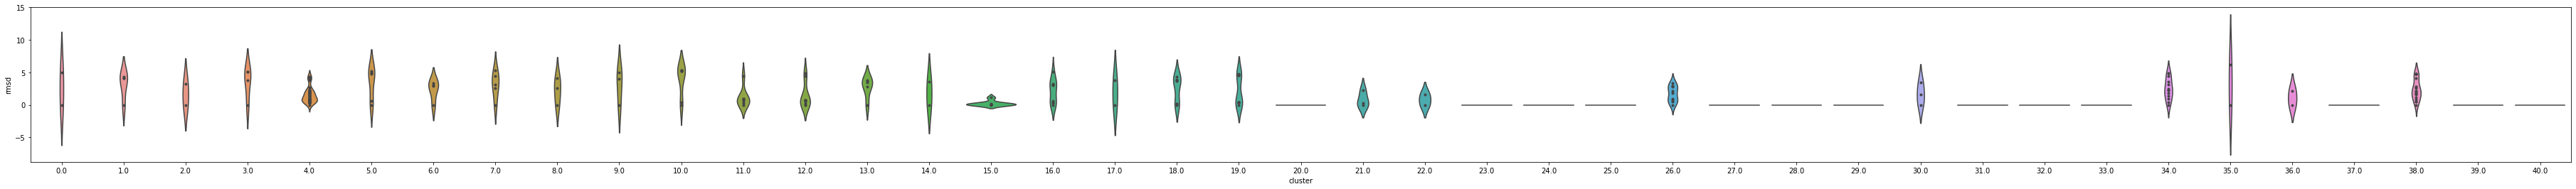

/Users/takabak/work/rna_bgsu/pdb/motif/cluster/triplebase/GAU


0    1   2   3   4   5    6   7    8    9   10   11   12  13  \
# of samples 7.0 23.0 3.0 2.0 2.0 5.0 17.0 6.0 12.0 16.0 3.0 38.0 10.0 1.0   
Avg          2.9  1.8 1.5 2.1 2.7 4.2  1.2 2.2  2.9  1.3 2.0  1.8  0.7 0.0   
Std          1.2  1.6 1.2 2.1 2.7 2.1  1.3 1.4  1.7  1.6 1.4  1.8  1.6 0.0   
Max          4.0  4.9 2.9 4.2 5.3 5.6  4.4 4.7  4.9  5.0 3.4  5.0  5.4 0.0   
Min          0.0  0.0 0.0 0.0 0.0 0.0  0.0 0.0  0.0  0.0 0.0  0.0  0.0 0.0   

              14  15  16  17  18   19  20  21  22  23  24  25  26  27  28  29  \
# of samples 7.0 6.0 9.0 1.0 4.0 39.0 2.0 1.0 1.0 1.0 4.0 1.0 1.0 1.0 1.0 1.0   
Avg          2.7 3.3 1.0 0.0 1.8  1.6 0.6 0.0 0.0 0.0 2.4 0.0 0.0 0.0 0.0 0.0   
Std          1.2 2.3 1.3 0.0 2.6  1.3 0.6 0.0 0.0 0.0 2.3 0.0 0.0 0.0 0.0 0.0   
Max          3.9 5.2 2.9 0.0 6.2  5.2 1.3 0.0 0.0 0.0 4.9 0.0 0.0 0.0 0.0 0.0   
Min          0.0 0.0 0.0 0.0 0.0  0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0   

              30  31  32  33  34  35  36  37  38  39  
# of samples 1.0 1.0 1.0 1.0 3.0 1.0 1.0 3.0 2.0 2.0  
Avg          0.0 0.0 0.0 0.0 0.2 0.0 0.0 2.4 0.2 1.5  
Std          0.0 0.0 0.0 0.0 0.2 0.0 0.0 1.7 0.2 1.5  
Max          0.0 0.0 0.0 0.0 0.4 0.0 0.0 3.7 0.4 3.1  
Min          0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0

<Figure size 432x288 with 0 Axes>

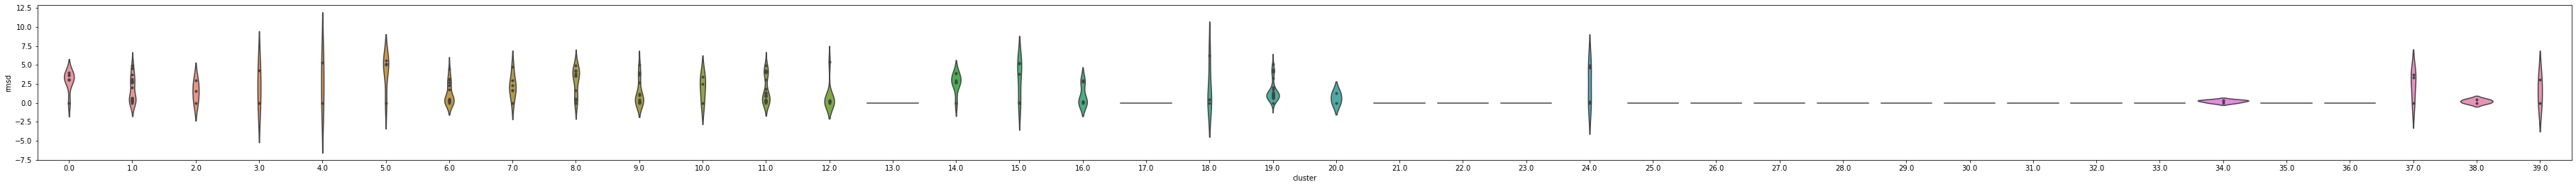

/Users/takabak/work/rna_bgsu/pdb/motif/cluster/triplebase/UUC


0   1   2   3    4   5   6   7   8   9   10  11  12   13  14  \
# of samples 4.0 4.0 2.0 9.0 10.0 6.0 4.0 3.0 4.0 2.0 3.0 1.0 2.0 21.0 1.0   
Avg          2.6 2.9 2.3 1.3  2.8 1.4 1.8 2.6 2.2 1.7 0.5 0.0 1.8  1.2 0.0   
Std          1.6 1.7 2.3 1.9  1.5 1.0 1.4 2.0 1.4 1.7 0.4 0.0 1.8  0.9 0.0   
Max          4.1 4.4 4.5 4.9  4.2 2.7 3.6 4.9 3.8 3.3 0.8 0.0 3.7  3.1 0.0   
Min          0.0 0.0 0.0 0.0  0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0  0.0 0.0   

              15   16  17  18  19  20  21  22  23  24  25  26  27  
# of samples 1.0 16.0 3.0 3.0 1.0 2.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0  
Avg          0.0  0.9 1.3 1.0 0.0 1.5 0.0 0.0 0.0 0.0 0.0 0.0 0.0  
Std          0.0  1.1 0.9 1.0 0.0 1.5 0.0 0.0 0.0 0.0 0.0 0.0 0.0  
Max          0.0  4.4 2.2 2.3 0.0 3.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0  
Min          0.0  0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0

<Figure size 432x288 with 0 Axes>

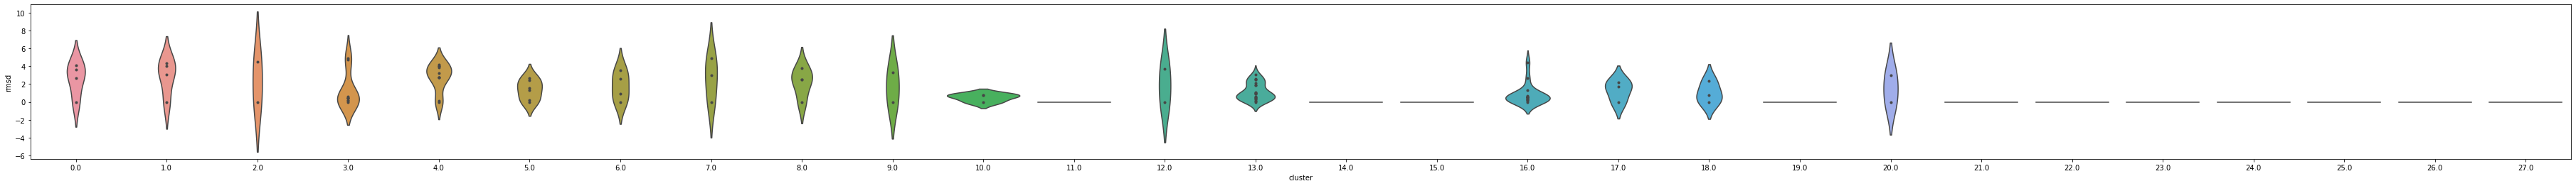

/Users/takabak/work/rna_bgsu/pdb/motif/cluster/triplebase/AGU


0   1   2   3   4    5   6    7   8   9   10  11  12  13  14  \
# of samples 30.0 9.0 2.0 3.0 6.0 33.0 3.0 28.0 1.0 4.0 4.0 2.0 5.0 1.0 1.0   
Avg           1.7 2.3 1.5 3.0 3.3  1.0 1.4  1.8 0.0 3.7 2.4 2.6 2.2 0.0 0.0   
Std           1.7 1.8 1.5 2.1 2.3  1.2 1.7  1.5 0.0 2.2 1.8 2.6 1.9 0.0 0.0   
Max           5.7 4.8 3.0 4.8 6.4  4.9 3.8  4.3 0.0 5.0 5.1 5.2 4.8 0.0 0.0   
Min           0.0 0.0 0.0 0.0 0.0  0.0 0.0  0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0   

              15  16  17  18  19  20  21  22  23  24  25  26  27  
# of samples 3.0 1.0 1.0 1.0 4.0 1.0 2.0 9.0 1.0 1.0 1.0 2.0 1.0  
Avg          3.0 0.0 0.0 0.0 1.3 0.0 2.2 1.5 0.0 0.0 0.0 1.0 0.0  
Std          2.1 0.0 0.0 0.0 1.7 0.0 2.2 2.0 0.0 0.0 0.0 1.0 0.0  
Max          4.8 0.0 0.0 0.0 4.1 0.0 4.3 5.3 0.0 0.0 0.0 1.9 0.0  
Min          0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0

<Figure size 432x288 with 0 Axes>

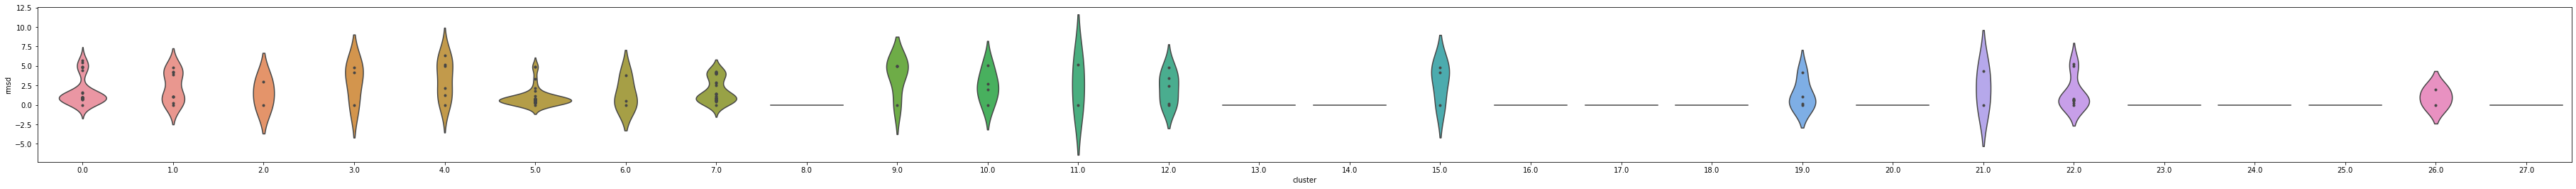

/Users/takabak/work/rna_bgsu/pdb/motif/cluster/triplebase/CAA


0    1    2   3   4   5   6   7    8   9   10   11   12  13  \
# of samples 78.0 12.0 20.0 9.0 5.0 3.0 3.0 3.0 12.0 1.0 4.0 14.0 13.0 2.0   
Avg           0.9  3.7  3.2 3.1 1.7 2.9 2.2 1.3  1.7 0.0 2.5  2.3  0.5 1.7   
Std           0.8  1.3  1.7 1.9 1.6 2.2 2.6 1.6  1.5 0.0 2.0  1.3  0.4 1.7   
Max           4.5  5.1  5.4 6.0 4.7 5.2 5.8 3.6  4.8 0.0 5.6  4.8  1.3 3.4   
Min           0.0  0.0  0.0 0.0 0.0 0.0 0.0 0.0  0.0 0.0 0.0  0.0  0.0 0.0   

              14  15  16  17   18  19  20  21  22  23  24  25  26  27  28  29  \
# of samples 1.0 2.0 2.0 3.0 17.0 1.0 1.0 1.0 6.0 1.0 7.0 4.0 1.0 1.0 7.0 1.0   
Avg          0.0 2.2 2.2 0.5  1.6 0.0 0.0 0.0 0.2 0.0 2.0 2.6 0.0 0.0 1.0 0.0   
Std          0.0 2.2 2.2 0.5  1.6 0.0 0.0 0.0 0.1 0.0 1.2 1.5 0.0 0.0 1.5 0.0   
Max          0.0 4.5 4.4 1.2  4.4 0.0 0.0 0.0 0.3 0.0 3.6 3.6 0.0 0.0 4.6 0.0   
Min          0.0 0.0 0.0 0.0  0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0   

              30  31  
# of samples 1.0 1.0  
Avg          0.0 0.0  
Std          0.0 0.0  
Max          0.0 0.0  
Min          0.0 0.0

<Figure size 432x288 with 0 Axes>

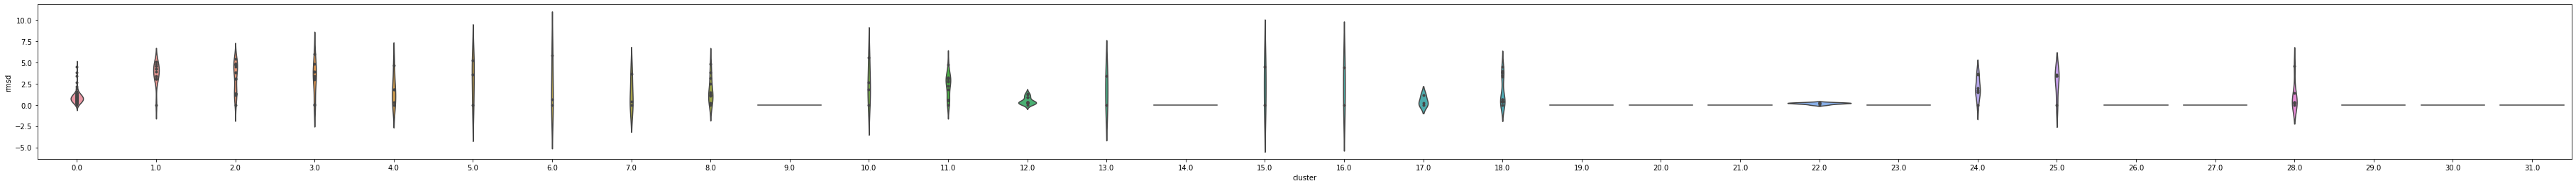

/Users/takabak/work/rna_bgsu/pdb/motif/cluster/triplebase/GAA


0    1   2   3   4   5   6   7   8     9   10  11  12  13  14  \
# of samples 28.0 12.0 5.0 4.0 8.0 7.0 6.0 3.0 5.0 128.0 3.0 4.0 3.0 5.0 5.0   
Avg           1.0  3.3 2.7 2.5 1.9 2.5 2.3 2.7 3.1   2.6 2.0 2.6 3.2 1.4 3.1   
Std           1.4  1.5 2.0 2.3 1.5 2.7 1.5 1.9 1.7   1.5 1.4 1.8 2.4 1.5 1.6   
Max           6.1  5.3 5.2 5.2 4.9 6.3 3.8 4.1 4.5   5.6 3.1 5.1 5.5 3.3 4.4   
Min           0.0  0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0   0.0 0.0 0.0 0.0 0.0 0.0   

               15  16   17   18  19   20  21  22  23  24  25   26  27   28  \
# of samples 12.0 3.0 21.0 36.0 4.0 21.0 1.0 2.0 1.0 3.0 3.0 13.0 4.0 14.0   
Avg           2.5 2.6  1.7  3.6 2.5  2.9 0.0 1.4 0.0 1.5 2.5  3.3 0.3  1.9   
Std           1.1 1.9  1.5  1.1 2.2  1.6 0.0 1.4 0.0 1.2 1.9  1.5 0.2  1.0   
Max           3.6 4.2  4.2  5.2 5.2  5.2 0.0 2.8 0.0 2.8 4.4  5.4 0.4  3.5   
Min           0.0 0.0  0.0  0.0 0.0  0.0 0.0 0.0 0.0 0.0 0.0  0.0 0.0  0.0   

              29   30  31   32  33  34  35  36  37  38   39   40  41  42  
# of samples 1.0 18.0 1.0 10.0 2.0 2.0 2.0 1.0 1.0 9.0 11.0 15.0 3.0 7.0  
Avg          0.0  3.1 0.0  2.2 2.2 1.0 0.1 0.0 0.0 1.5  1.9  2.6 2.3 2.3  
Std          0.0  1.2 0.0  1.8 2.2 1.0 0.1 0.0 0.0 1.2  1.6  1.4 2.1 1.9  
Max          0.0  4.7 0.0  5.8 4.5 2.0 0.2 0.0 0.0 3.6  3.9  4.4 5.2 4.4  
Min          0.0  0.0 0.0  0.0 0.0 0.0 0.0 0.0 0.0 0.0  0.0  0.0 0.0 0.0

<Figure size 432x288 with 0 Axes>

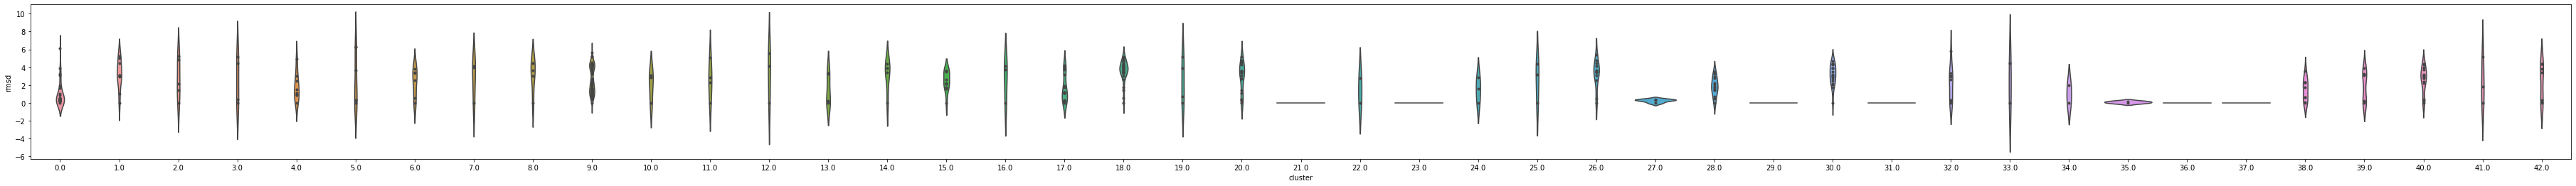

/Users/takabak/work/rna_bgsu/pdb/motif/cluster/triplebase/AGA


0   1   2   3   4    5   6   7   8    9    10   11  12  13  14  \
# of samples 6.0 2.0 9.0 2.0 2.0 23.0 2.0 2.0 2.0 32.0 11.0 12.0 4.0 1.0 3.0   
Avg          2.8 2.8 2.9 1.9 2.3  2.3 2.0 2.1 1.4  1.7  2.6  2.9 3.0 0.0 0.8   
Std          1.5 2.8 1.5 1.9 2.3  1.2 2.0 2.1 1.4  1.0  1.5  2.8 1.8 0.0 0.9   
Max          4.5 5.6 5.2 3.8 4.5  3.3 3.9 4.1 2.8  3.8  6.0  6.4 4.4 0.0 2.0   
Min          0.0 0.0 0.0 0.0 0.0  0.0 0.0 0.0 0.0  0.0  0.0  0.0 0.0 0.0 0.0   

              15  16  17  18   19  20  21  22  23  24  25  26  27  28  29  30  \
# of samples 6.0 2.0 1.0 3.0 11.0 9.0 3.0 9.0 2.0 4.0 1.0 5.0 1.0 1.0 1.0 2.0   
Avg          3.4 1.2 0.0 0.4  3.5 0.8 1.6 1.1 1.8 0.3 0.0 2.5 0.0 0.0 0.0 0.2   
Std          2.2 1.2 0.0 0.5  1.1 0.6 1.3 0.9 1.8 0.2 0.0 1.5 0.0 0.0 0.0 0.2   
Max          5.5 2.5 0.0 1.0  4.3 1.9 3.1 2.5 3.5 0.4 0.0 3.9 0.0 0.0 0.0 0.3   
Min          0.0 0.0 0.0 0.0  0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0   

              31  32  33  
# of samples 1.0 7.0 1.0  
Avg          0.0 0.6 0.0  
Std          0.0 1.1 0.0  
Max          0.0 3.2 0.0  
Min          0.0 0.0 0.0

<Figure size 432x288 with 0 Axes>

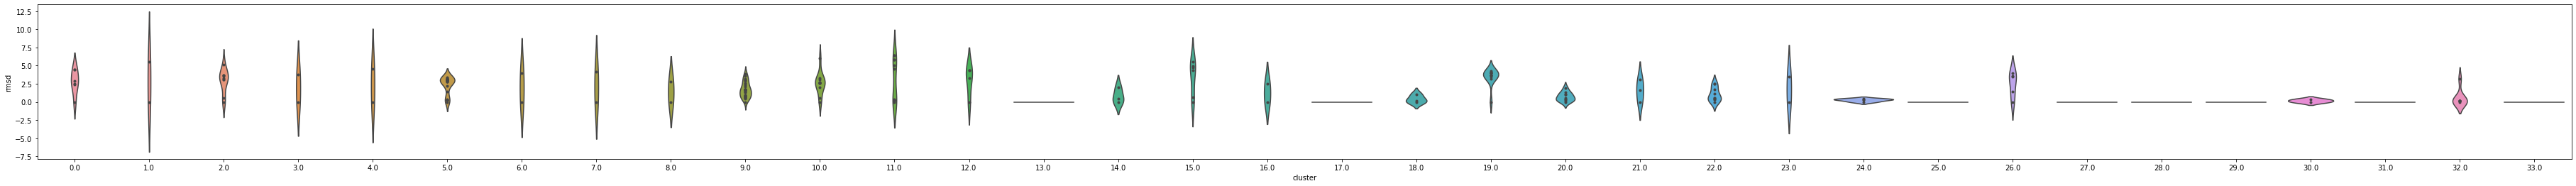

/Users/takabak/work/rna_bgsu/pdb/motif/cluster/triplebase/CAU


0   1    2   3   4   5   6    7   8   9   10  11   12  13  14  \
# of samples 6.0 2.0 35.0 5.0 4.0 5.0 5.0 11.0 4.0 6.0 9.0 3.0 19.0 1.0 3.0   
Avg          2.6 2.0  1.4 1.6 1.5 2.8 2.0  0.8 0.9 2.0 3.8 2.1  0.5 0.0 1.9   
Std          1.6 2.0  1.3 1.7 1.3 1.5 1.6  1.0 1.2 0.9 2.0 1.5  0.9 0.0 1.4   
Max          4.5 4.1  5.8 4.6 3.6 4.1 4.7  3.9 3.0 2.6 5.5 3.2  4.0 0.0 3.1   
Min          0.0 0.0  0.0 0.0 0.0 0.0 0.0  0.0 0.0 0.0 0.0 0.0  0.0 0.0 0.0   

              15  16  17  18  19  20  21  22  23  24  25  
# of samples 1.0 1.0 7.0 3.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0  
Avg          0.0 0.0 1.1 2.7 0.0 0.0 0.0 0.0 0.0 0.0 0.0  
Std          0.0 0.0 1.5 1.9 0.0 0.0 0.0 0.0 0.0 0.0 0.0  
Max          0.0 0.0 4.3 4.4 0.0 0.0 0.0 0.0 0.0 0.0 0.0  
Min          0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0

<Figure size 432x288 with 0 Axes>

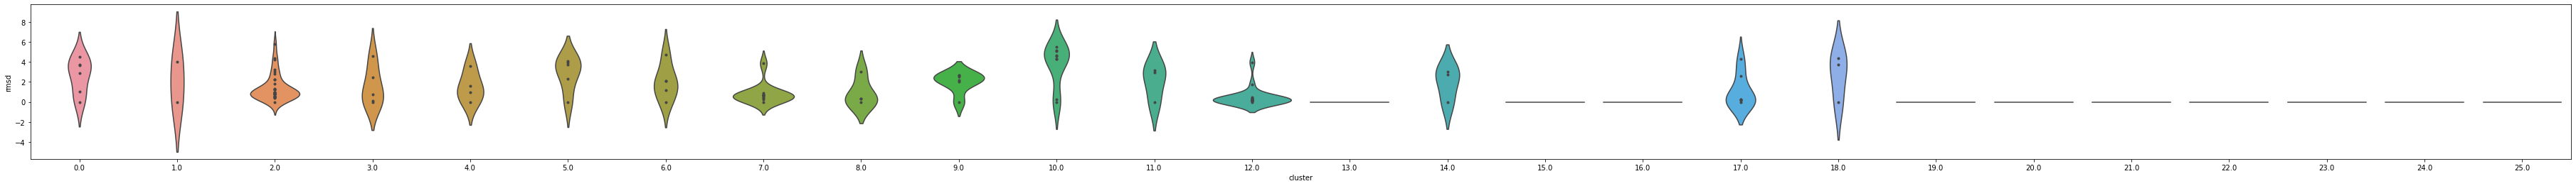

/Users/takabak/work/rna_bgsu/pdb/motif/cluster/triplebase/CAG


0    1   2   3   4   5   6   7   8   9    10  11  12  13  14  \
# of samples 11.0 78.0 6.0 4.0 3.0 6.0 3.0 4.0 8.0 3.0 10.0 3.0 8.0 8.0 3.0   
Avg           2.4  1.1 3.5 2.5 1.3 1.2 1.2 1.1 1.5 0.3  1.7 1.0 2.0 0.4 1.1   
Std           1.5  0.7 1.7 2.2 1.4 1.4 1.6 1.7 2.0 0.2  1.6 1.1 1.8 0.3 0.8   
Max           4.6  4.0 5.5 4.7 3.3 3.7 3.6 4.1 5.2 0.5  4.2 2.5 4.4 1.0 1.8   
Min           0.0  0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0  0.0 0.0 0.0 0.0 0.0   

              15  16  17  18  19  20  21  22   23  24  25  26  27  28  29  30  \
# of samples 2.0 2.0 9.0 3.0 1.0 2.0 1.0 1.0 23.0 1.0 1.0 1.0 1.0 1.0 2.0 1.0   
Avg          1.2 0.3 1.6 1.4 0.0 0.0 0.0 0.0  1.0 0.0 0.0 0.0 0.0 0.0 0.4 0.0   
Std          1.2 0.3 1.6 1.9 0.0 0.0 0.0 0.0  1.2 0.0 0.0 0.0 0.0 0.0 0.4 0.0   
Max          2.4 0.6 3.7 4.1 0.0 0.1 0.0 0.0  3.5 0.0 0.0 0.0 0.0 0.0 0.9 0.0   
Min          0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0  0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0   

              31  32  33  34  35  
# of samples 1.0 1.0 1.0 1.0 3.0  
Avg          0.0 0.0 0.0 0.0 1.3  
Std          0.0 0.0 0.0 0.0 1.8  
Max          0.0 0.0 0.0 0.0 3.8  
Min          0.0 0.0 0.0 0.0 0.0

<Figure size 432x288 with 0 Axes>

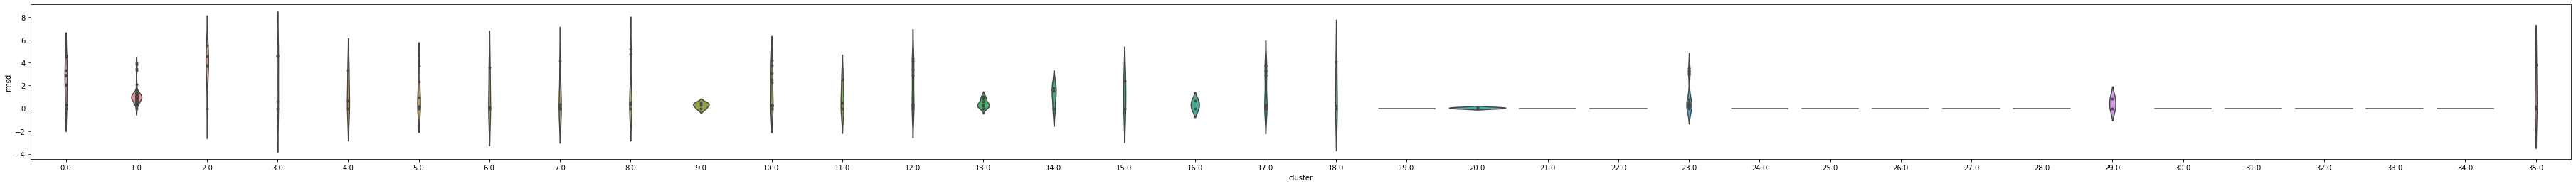

/Users/takabak/work/rna_bgsu/pdb/motif/cluster/triplebase/GGC


0   1   2   3    4   5   6   7   8   9   10  11  12  13  14  15  \
# of samples 2.0 3.0 2.0 6.0 34.0 2.0 5.0 4.0 2.0 2.0 3.0 1.0 7.0 1.0 9.0 1.0   
Avg          2.9 2.6 1.8 3.2  1.6 1.6 3.1 2.1 2.9 2.1 1.9 0.0 1.6 0.0 2.2 0.0   
Std          2.9 2.0 1.8 2.5  1.4 1.6 1.8 1.6 2.9 2.1 1.4 0.0 2.4 0.0 1.5 0.0   
Max          5.9 4.7 3.6 6.5  5.6 3.2 5.4 4.1 5.7 4.2 3.4 0.0 5.7 0.0 3.6 0.0   
Min          0.0 0.0 0.0 0.0  0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0   

              16  17   18  19  20  21  22  23  24  25  
# of samples 1.0 1.0 45.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0  
Avg          0.0 0.0  0.8 0.0 0.0 0.0 0.0 0.0 0.0 0.0  
Std          0.0 0.0  1.1 0.0 0.0 0.0 0.0 0.0 0.0 0.0  
Max          0.0 0.0  5.5 0.0 0.0 0.0 0.0 0.0 0.0 0.0  
Min          0.0 0.0  0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0

<Figure size 432x288 with 0 Axes>

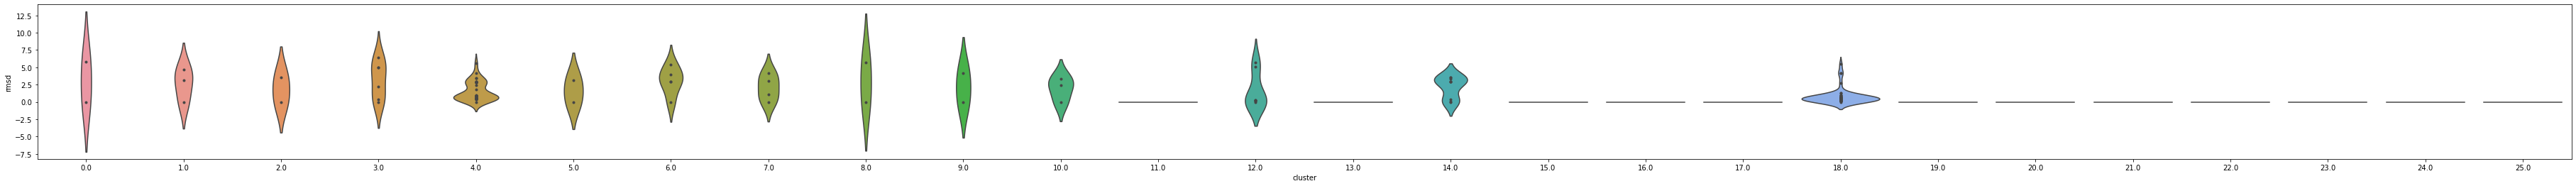

/Users/takabak/work/rna_bgsu/pdb/motif/cluster/triplebase/AAC


0   1   2    3   4    5   6     7   8   9    10  11  12  13  14  \
# of samples 4.0 2.0 6.0 23.0 8.0 39.0 2.0 110.0 2.0 1.0 20.0 3.0 4.0 3.0 2.0   
Avg          2.3 1.3 2.6  1.0 3.2  2.3 1.9   1.1 1.6 0.0  1.6 3.2 2.2 2.0 1.8   
Std          1.6 1.3 1.7  1.1 1.3  0.9 1.9   0.6 1.6 0.0  1.7 2.3 2.2 1.5 1.8   
Max          4.1 2.5 5.2  3.9 4.7  4.4 3.9   3.9 3.2 0.0  4.3 4.9 5.1 3.5 3.5   
Min          0.0 0.0 0.0  0.0 0.0  0.0 0.0   0.0 0.0 0.0  0.0 0.0 0.0 0.0 0.0   

              15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  
# of samples 1.0 2.0 1.0 4.0 1.0 1.0 2.0 6.0 1.0 9.0 1.0 1.0 5.0 1.0 1.0  
Avg          0.0 1.7 0.0 0.9 0.0 0.0 0.4 1.8 0.0 1.9 0.0 0.0 1.0 0.0 0.0  
Std          0.0 1.7 0.0 0.5 0.0 0.0 0.4 0.9 0.0 0.9 0.0 0.0 0.6 0.0 0.0  
Max          0.0 3.3 0.0 1.4 0.0 0.0 0.8 2.9 0.0 3.6 0.0 0.0 1.6 0.0 0.0  
Min          0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0

<Figure size 432x288 with 0 Axes>

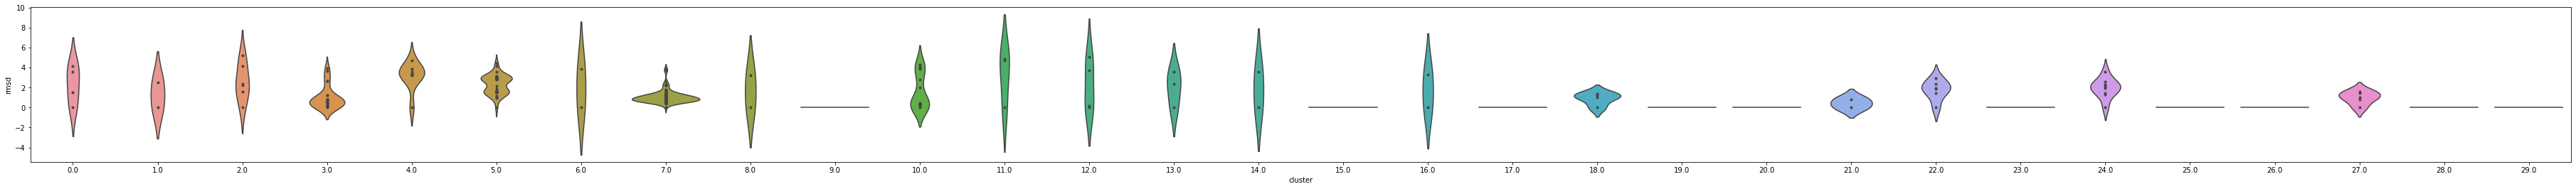

/Users/takabak/work/rna_bgsu/pdb/motif/cluster/triplebase/GUC


0   1    2   3   4    5    6   7   8   9   10  11  12  13  14  \
# of samples 6.0 7.0 11.0 3.0 3.0 16.0 17.0 3.0 2.0 8.0 6.0 5.0 1.0 1.0 1.0   
Avg          1.8 2.1  2.2 2.4 2.2  0.9  2.3 1.3 1.5 2.6 0.2 0.3 0.0 0.0 0.0   
Std          2.3 1.8  2.0 3.2 2.2  1.0  1.9 0.9 1.5 1.7 0.1 0.2 0.0 0.0 0.0   
Max          5.3 4.1  5.8 7.0 5.2  3.6  5.1 2.2 3.0 4.4 0.4 0.5 0.0 0.0 0.0   
Min          0.0 0.0  0.0 0.0 0.0  0.0  0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0   

              15  16  17  18  19  20  21  22  23  24  
# of samples 1.0 2.0 2.0 1.0 2.0 2.0 1.0 1.0 1.0 1.0  
Avg          0.0 2.0 1.9 0.0 0.5 1.1 0.0 0.0 0.0 0.0  
Std          0.0 2.0 1.9 0.0 0.5 1.1 0.0 0.0 0.0 0.0  
Max          0.0 3.9 3.7 0.0 1.0 2.2 0.0 0.0 0.0 0.0  
Min          0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0

<Figure size 432x288 with 0 Axes>

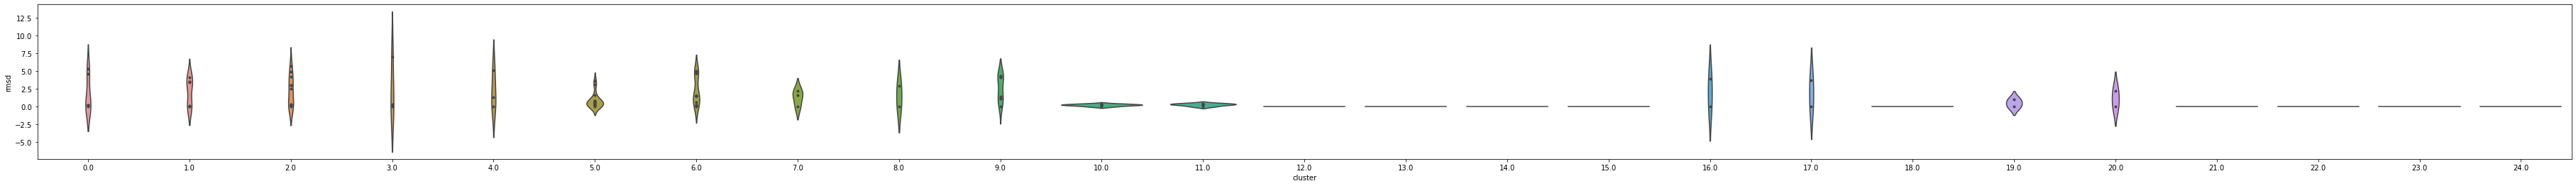

/Users/takabak/work/rna_bgsu/pdb/motif/cluster/triplebase/UAU


0   1   2   3   4   5   6   7   8   9   10  11  12   13  14  \
# of samples 10.0 9.0 5.0 5.0 6.0 3.0 7.0 6.0 2.0 7.0 3.0 4.0 3.0 44.0 2.0   
Avg           2.4 2.6 2.5 4.5 4.3 1.0 2.6 1.8 2.6 2.0 1.9 1.3 1.9  4.0 0.4   
Std           1.7 2.5 1.3 2.3 2.0 1.0 1.9 2.3 2.6 1.2 2.6 1.8 1.9  2.6 0.4   
Max           4.4 5.8 3.5 6.2 5.5 2.4 6.6 5.7 5.2 3.6 5.6 4.4 4.5  7.1 0.9   
Min           0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0  0.0 0.0   

              15  16  17   18  19  20  21  22  23  24  25  26  27  28  29  30  \
# of samples 1.0 1.0 1.0 27.0 1.0 5.0 1.0 3.0 1.0 1.0 3.0 2.0 1.0 2.0 1.0 1.0   
Avg          0.0 0.0 0.0  0.8 0.0 2.3 0.0 0.4 0.0 0.0 1.4 1.6 0.0 1.4 0.0 0.0   
Std          0.0 0.0 0.0  1.4 0.0 1.3 0.0 0.3 0.0 0.0 1.8 1.6 0.0 1.4 0.0 0.0   
Max          0.0 0.0 0.0  5.3 0.0 3.6 0.0 0.8 0.0 0.0 3.9 3.1 0.0 2.8 0.0 0.0   
Min          0.0 0.0 0.0  0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0   

              31  
# of samples 1.0  
Avg          0.0  
Std          0.0  
Max          0.0  
Min          0.0

<Figure size 432x288 with 0 Axes>

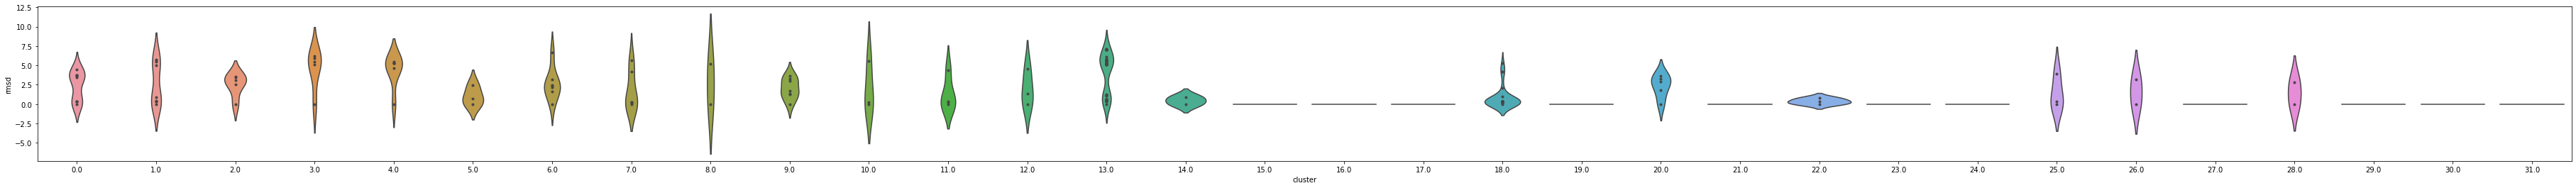

/Users/takabak/work/rna_bgsu/pdb/motif/cluster/triplebase/UAG


0   1   2   3   4   5   6   7   8    9   10  11  12  13  14  15  \
# of samples 3.0 6.0 5.0 2.0 2.0 4.0 7.0 4.0 5.0 12.0 3.0 4.0 4.0 3.0 5.0 1.0   
Avg          2.0 1.7 3.7 2.3 2.3 3.3 2.4 1.9 1.2  1.0 2.6 3.4 1.7 3.0 2.3 0.0   
Std          1.4 1.9 2.0 2.3 2.3 1.9 1.2 1.3 1.9  1.4 1.9 2.0 1.7 2.2 1.7 0.0   
Max          3.0 4.4 5.5 4.6 4.6 4.7 4.5 3.8 4.9  5.5 4.3 5.0 4.2 5.1 4.6 0.0   
Min          0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0  0.0 0.0 0.0 0.0 0.0 0.0 0.0   

              16   17  18  19  20  21  22  23   24  25   26  27   28  29   30  \
# of samples 3.0 18.0 7.0 1.0 3.0 1.0 6.0 1.0 69.0 1.0 19.0 2.0 10.0 7.0 14.0   
Avg          1.9  1.7 2.4 0.0 1.4 0.0 3.0 0.0  2.8 0.0  2.7 1.5  0.3 0.7  3.5   
Std          1.3  1.1 1.1 0.0 1.9 0.0 1.9 0.0  1.6 0.0  2.9 1.5  0.2 1.0  1.8   
Max          3.0  3.7 3.5 0.0 4.0 0.0 5.1 0.0  5.0 0.0  6.7 3.1  0.5 3.0  4.8   
Min          0.0  0.0 0.0 0.0 0.0 0.0 0.0 0.0  0.0 0.0  0.0 0.0  0.0 0.0  0.0   

              31  32  33  34  35  36  37  38  
# of samples 1.0 1.0 6.0 2.0 1.0 1.0 1.0 1.0  
Avg          0.0 0.0 0.1 1.1 0.0 0.0 0.0 0.0  
Std          0.0 0.0 0.1 1.1 0.0 0.0 0.0 0.0  
Max          0.0 0.0 0.2 2.3 0.0 0.0 0.0 0.0  
Min          0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0

<Figure size 432x288 with 0 Axes>

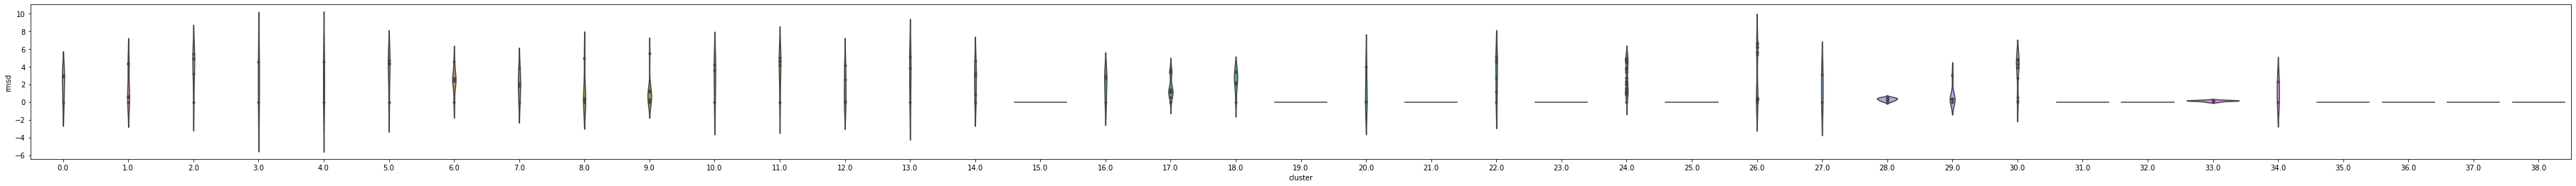

/Users/takabak/work/rna_bgsu/pdb/motif/cluster/triplebase/AUA


0   1    2    3   4    5   6   7   8   9   10  11  12   13  14  \
# of samples 80.0 5.0 38.0 18.0 3.0 31.0 4.0 2.0 1.0 5.0 5.0 2.0 3.0 11.0 3.0   
Avg           3.3 0.7  2.5  1.5 2.4  2.1 2.5 1.5 0.0 1.3 2.5 1.8 2.7  3.2 2.6   
Std           1.9 1.1  2.0  2.0 2.0  2.1 1.4 1.5 0.0 2.0 2.0 1.8 1.9  2.5 2.1   
Max           5.9 2.9  6.0  6.0 4.8  5.9 3.5 2.9 0.0 5.4 4.6 3.7 4.4  5.7 5.2   
Min           0.0 0.0  0.0  0.0 0.0  0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0  0.0 0.0   

               15  16  17  18  19  20  21   22  23  24  25  26  27  28  29  \
# of samples 16.0 1.0 1.0 1.0 2.0 6.0 7.0 19.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0   
Avg           1.4 0.0 0.0 0.0 1.0 1.4 3.2  1.9 0.0 0.0 0.0 0.0 0.0 0.0 0.0   
Std           1.8 0.0 0.0 0.0 1.0 1.8 2.4  1.8 0.0 0.0 0.0 0.0 0.0 0.0 0.0   
Max           5.9 0.0 0.0 0.0 2.0 4.9 6.1  5.4 0.0 0.0 0.0 0.0 0.0 0.0 0.0   
Min           0.0 0.0 0.0 0.0 0.0 0.0 0.0  0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0   

              30  31  
# of samples 1.0 1.0  
Avg          0.0 0.0  
Std          0.0 0.0  
Max          0.0 0.0  
Min          0.0 0.0

<Figure size 432x288 with 0 Axes>

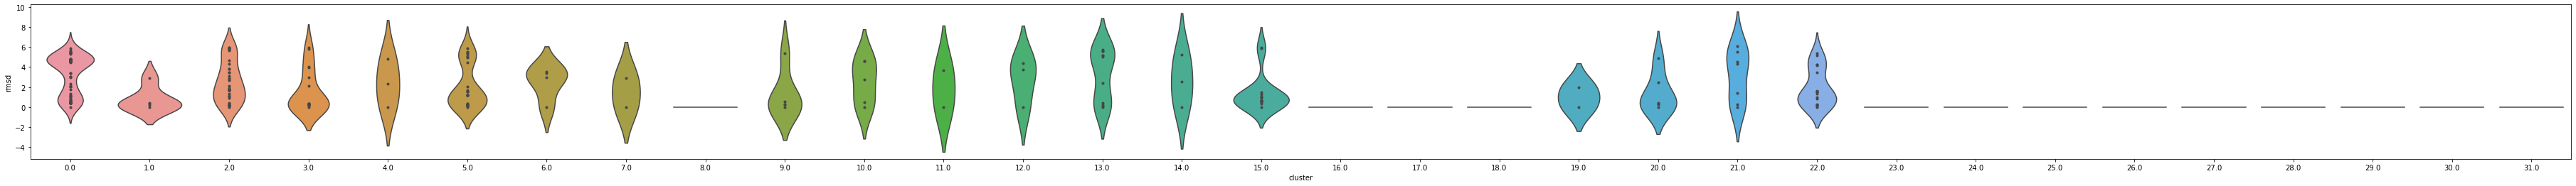

/Users/takabak/work/rna_bgsu/pdb/motif/cluster/triplebase/UGC


0    1    2   3   4    5   6   7   8    9   10  11  12  13  14  \
# of samples 4.0 34.0 24.0 2.0 8.0 47.0 3.0 6.0 5.0 40.0 2.0 1.0 4.0 1.0 1.0   
Avg          2.0  2.8  1.6 2.2 2.4  1.9 2.9 1.0 3.3  4.5 2.3 0.0 0.7 0.0 0.0   
Std          1.5  2.3  1.5 2.2 1.5  1.3 2.5 1.7 1.7  1.5 2.3 0.0 1.2 0.0 0.0   
Max          3.8  5.5  5.7 4.4 5.7  5.3 6.1 4.9 4.8  6.0 4.5 0.0 2.9 0.0 0.0   
Min          0.0  0.0  0.0 0.0 0.0  0.0 0.0 0.0 0.0  0.0 0.0 0.0 0.0 0.0 0.0   

              15  16  17   18  19  20  21  22  23  24  25  26  27  28  
# of samples 1.0 3.0 1.0 15.0 1.0 3.0 1.0 3.0 1.0 1.0 1.0 7.0 1.0 1.0  
Avg          0.0 1.2 0.0  1.2 0.0 1.5 0.0 2.0 0.0 0.0 0.0 2.4 0.0 0.0  
Std          0.0 1.4 0.0  1.2 0.0 1.3 0.0 2.2 0.0 0.0 0.0 1.8 0.0 0.0  
Max          0.0 3.2 0.0  5.5 0.0 3.2 0.0 5.1 0.0 0.0 0.0 5.1 0.0 0.0  
Min          0.0 0.0 0.0  0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0

<Figure size 432x288 with 0 Axes>

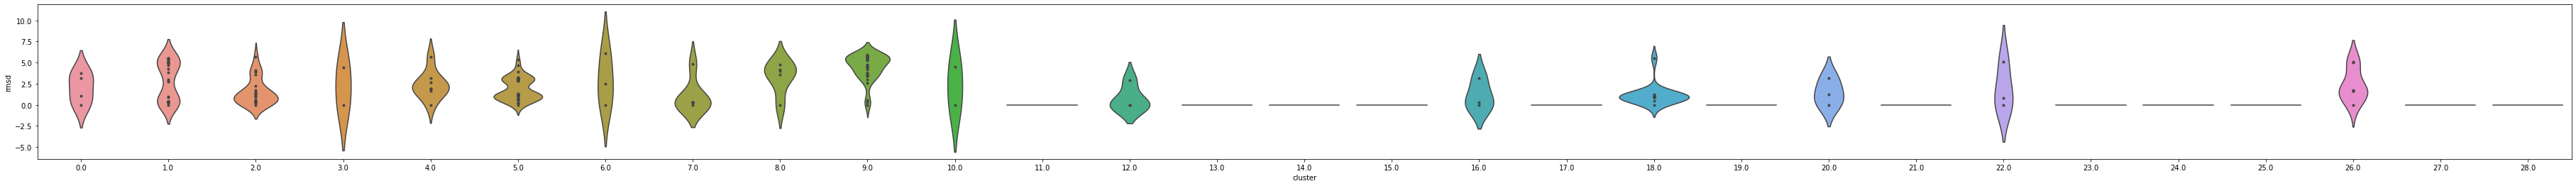

/Users/takabak/work/rna_bgsu/pdb/motif/cluster/triplebase/AUU


0    1    2    3   4   5   6   7   8   9    10  11  12  13  14  \
# of samples 2.0 14.0 15.0 63.0 2.0 3.0 3.0 5.0 3.0 5.0 21.0 3.0 3.0 2.0 1.0   
Avg          1.9  2.9  4.1  2.4 2.3 2.4 2.6 3.7 1.8 2.4  1.1 2.7 3.7 2.1 0.0   
Std          1.9  1.8  1.5  1.9 2.3 1.8 2.1 2.0 2.4 1.6  1.4 2.0 2.7 2.1 0.0   
Max          3.8  5.8  6.3  5.4 4.7 4.4 5.2 5.6 5.2 3.8  5.6 4.9 6.0 4.2 0.0   
Min          0.0  0.0  0.0  0.0 0.0 0.0 0.0 0.0 0.0 0.0  0.0 0.0 0.0 0.0 0.0   

              15  16  17  18  19  20  21  22  23  24  25  26  27  28  
# of samples 1.0 2.0 2.0 4.0 1.0 1.0 1.0 2.0 1.0 1.0 4.0 1.0 4.0 1.0  
Avg          0.0 1.9 0.1 2.3 0.0 0.0 0.0 0.1 0.0 0.0 0.8 0.0 1.5 0.0  
Std          0.0 1.9 0.1 1.9 0.0 0.0 0.0 0.1 0.0 0.0 1.1 0.0 1.2 0.0  
Max          0.0 3.9 0.1 4.9 0.0 0.0 0.0 0.3 0.0 0.0 2.8 0.0 3.3 0.0  
Min          0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0

<Figure size 432x288 with 0 Axes>

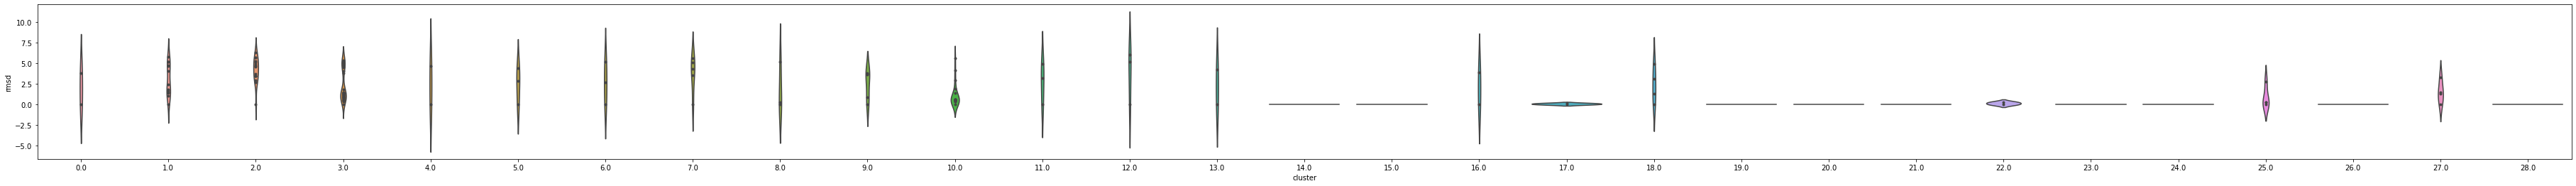

/Users/takabak/work/rna_bgsu/pdb/motif/cluster/triplebase/AUG


0   1   2   3   4    5   6   7   8   9   10  11  12  13   14  \
# of samples 34.0 5.0 9.0 3.0 3.0 21.0 2.0 6.0 2.0 6.0 4.0 3.0 3.0 7.0 19.0   
Avg           2.7 2.5 1.2 2.6 2.5  2.7 2.4 2.9 1.0 3.0 1.0 2.2 3.7 2.4  1.2   
Std           1.2 2.0 0.9 1.8 1.9  1.9 2.4 1.3 1.0 1.4 1.6 1.5 2.6 1.5  1.5   
Max           4.9 4.4 2.6 4.1 4.7  4.9 4.7 3.7 2.1 4.1 3.8 3.4 6.0 4.4  4.0   
Min           0.0 0.0 0.0 0.0 0.0  0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0  0.0   

              15  16  17  18  19  20  21  22  23  24  25  26  27   28  29  30  \
# of samples 1.0 2.0 1.0 1.0 1.0 4.0 2.0 1.0 4.0 1.0 1.0 1.0 1.0 67.0 1.0 1.0   
Avg          0.0 0.2 0.0 0.0 0.0 1.5 0.5 0.0 0.9 0.0 0.0 0.0 0.0  3.1 0.0 0.0   
Std          0.0 0.2 0.0 0.0 0.0 1.8 0.5 0.0 0.6 0.0 0.0 0.0 0.0  2.1 0.0 0.0   
Max          0.0 0.4 0.0 0.0 0.0 4.7 0.9 0.0 1.5 0.0 0.0 0.0 0.0  6.6 0.0 0.0   
Min          0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0  0.0 0.0 0.0   

              31  32  33  34  
# of samples 1.0 1.0 1.0 1.0  
Avg          0.0 0.0 0.0 0.0  
Std          0.0 0.0 0.0 0.0  
Max          0.0 0.0 0.0 0.0  
Min          0.0 0.0 0.0 0.0

<Figure size 432x288 with 0 Axes>

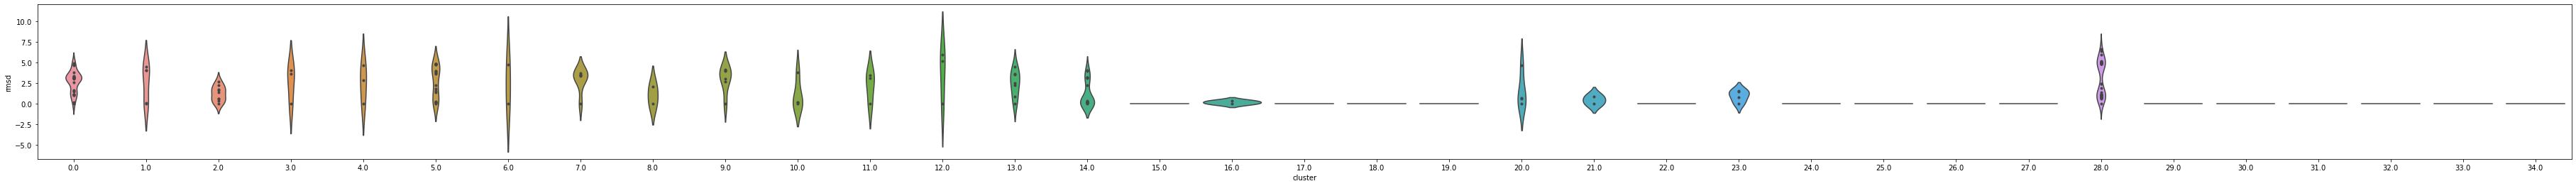

/Users/takabak/work/rna_bgsu/pdb/motif/cluster/triplebase/UAA


0   1    2   3   4     5   6    7    8   9   10  11  12   13  \
# of samples 13.0 4.0 15.0 2.0 7.0 144.0 2.0 14.0 18.0 2.0 3.0 4.0 7.0 10.0   
Avg           3.3 2.9  0.8 2.0 1.1   4.8 1.9  1.8  1.3 1.9 2.2 2.0 2.7  3.1   
Std           1.8 1.8  1.2 2.0 1.5   1.5 1.9  1.1  1.8 1.9 2.1 2.3 2.3  2.7   
Max           5.4 4.8  3.8 4.0 4.0   6.3 3.7  4.8  4.8 3.8 5.0 5.8 5.5  6.2   
Min           0.0 0.0  0.0 0.0 0.0   0.0 0.0  0.0  0.0 0.0 0.0 0.0 0.0  0.0   

               14   15  16  17  18  19  20  21  22  23  24  25  26  27  28  \
# of samples 10.0 19.0 7.0 3.0 3.0 1.0 1.0 1.0 1.0 3.0 1.0 8.0 2.0 1.0 2.0   
Avg           1.0  3.1 1.6 0.5 2.3 0.0 0.0 0.0 0.0 2.9 0.0 1.3 2.2 0.0 2.9   
Std           1.6  1.8 1.2 0.6 2.4 0.0 0.0 0.0 0.0 2.1 0.0 1.7 2.2 0.0 2.9   
Max           5.4  5.4 3.3 1.3 5.6 0.0 0.0 0.0 0.0 5.1 0.0 5.1 4.3 0.0 5.8   
Min           0.0  0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0   

              29  30  31  32  33  34  35  36  37  38  
# of samples 3.0 2.0 1.0 1.0 1.0 5.0 2.0 4.0 4.0 3.0  
Avg          2.6 0.3 0.0 0.0 0.0 2.4 0.8 2.9 1.8 3.0  
Std          1.9 0.3 0.0 0.0 0.0 1.7 0.8 1.7 1.8 2.1  
Max          4.6 0.6 0.0 0.0 0.0 4.7 1.6 3.9 4.0 4.6  
Min          0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0

<Figure size 432x288 with 0 Axes>

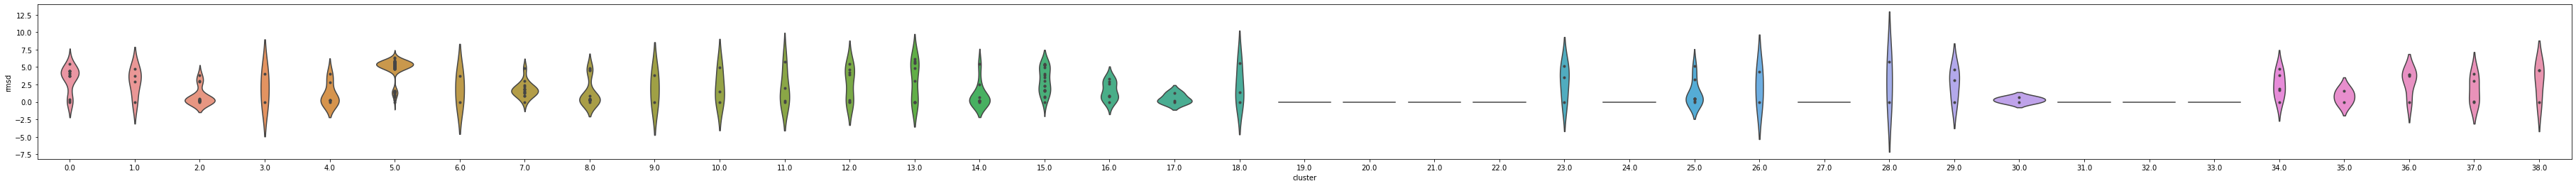

/Users/takabak/work/rna_bgsu/pdb/motif/cluster/triplebase/CUC


0   1    2   3   4   5   6   7   8   9   10  11  12  13   14  \
# of samples 3.0 2.0 18.0 5.0 2.0 3.0 2.0 2.0 3.0 1.0 1.0 1.0 1.0 2.0 19.0   
Avg          1.6 1.9  1.6 2.2 1.8 2.6 1.9 1.8 2.1 0.0 0.0 0.0 0.0 0.9  0.8   
Std          1.9 1.9  1.3 1.1 1.8 1.8 1.9 1.8 1.6 0.0 0.0 0.0 0.0 0.9  0.9   
Max          4.2 3.7  4.7 3.0 3.6 3.9 3.8 3.6 3.8 0.0 0.0 0.0 0.0 1.9  3.6   
Min          0.0 0.0  0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0  0.0   

              15  16  17  18  19  20  
# of samples 1.0 3.0 1.0 2.0 1.0 1.0  
Avg          0.0 0.1 0.0 0.6 0.0 0.0  
Std          0.0 0.1 0.0 0.6 0.0 0.0  
Max          0.0 0.3 0.0 1.2 0.0 0.0  
Min          0.0 0.0 0.0 0.0 0.0 0.0

<Figure size 432x288 with 0 Axes>

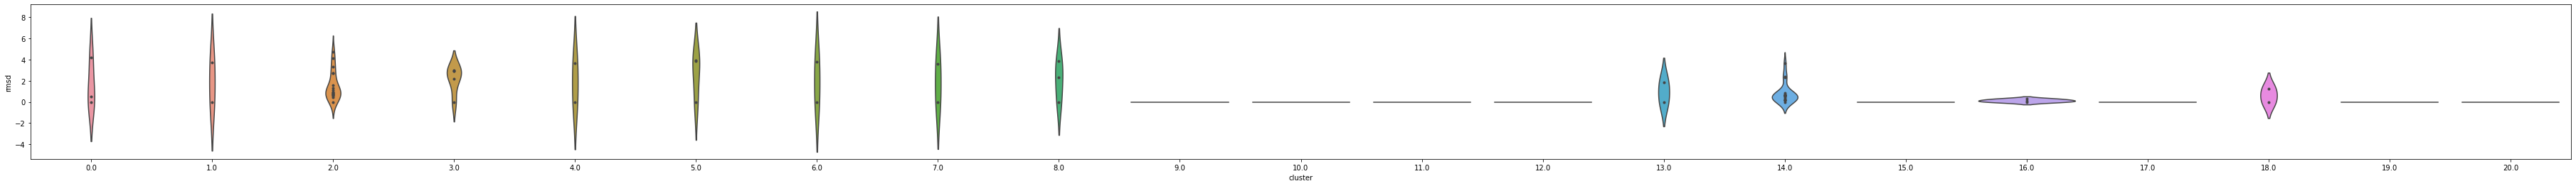

/Users/takabak/work/rna_bgsu/pdb/motif/cluster/triplebase/UCC


0   1   2   3   4   5   6   7    8   9   10  11  12  13
# of samples 8.0 2.0 6.0 2.0 1.0 3.0 1.0 2.0 16.0 1.0 1.0 8.0 1.0 1.0
Avg          1.2 1.5 2.1 1.9 0.0 1.6 0.0 0.0  1.0 0.0 0.0 1.6 0.0 0.0
Std          1.8 1.4 1.2 1.9 0.0 2.2 0.0 0.0  0.4 0.0 0.0 1.0 0.0 0.0
Max          5.3 2.9 3.6 3.9 0.0 4.7 0.0 0.1  1.7 0.0 0.0 3.1 0.0 0.0
Min          0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0  0.0 0.0 0.0 0.0 0.0 0.0

<Figure size 432x288 with 0 Axes>

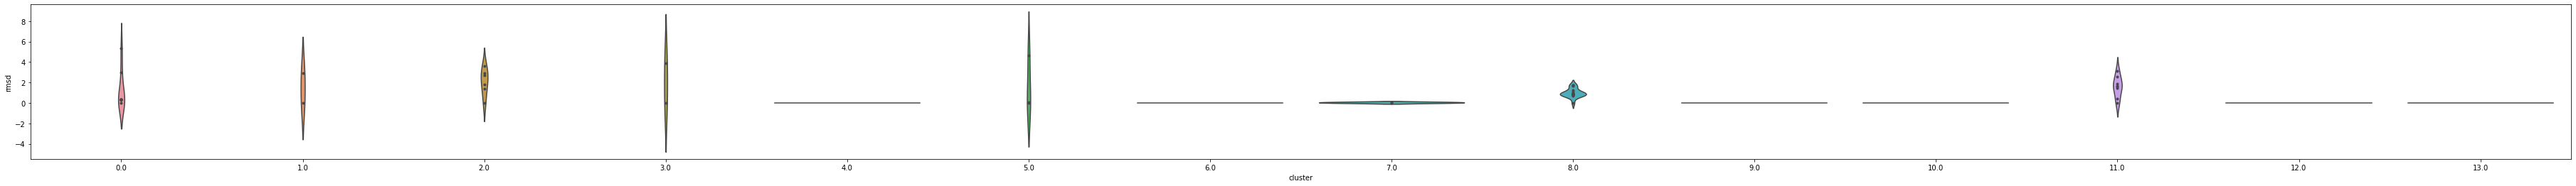

/Users/takabak/work/rna_bgsu/pdb/motif/cluster/triplebase/ACA


0    1   2   3    4    5   6   7   8   9   10  11  12  13  14  \
# of samples 3.0 30.0 5.0 1.0 26.0 10.0 4.0 1.0 1.0 1.0 2.0 4.0 1.0 4.0 2.0   
Avg          2.7  1.4 1.7 0.0  1.0  2.5 1.1 0.0 0.0 0.0 1.2 1.8 0.0 2.4 2.7   
Std          2.0  1.1 1.6 0.0  1.2  1.0 1.8 0.0 0.0 0.0 1.2 1.1 0.0 1.4 2.7   
Max          4.6  4.8 4.2 0.0  4.0  3.4 4.3 0.0 0.0 0.0 2.4 2.8 0.0 3.5 5.3   
Min          0.0  0.0 0.0 0.0  0.0  0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0   

              15  16  17  18  19  20  21  22  23  24  
# of samples 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0  
Avg          0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0  
Std          0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0  
Max          0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0  
Min          0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0

<Figure size 432x288 with 0 Axes>

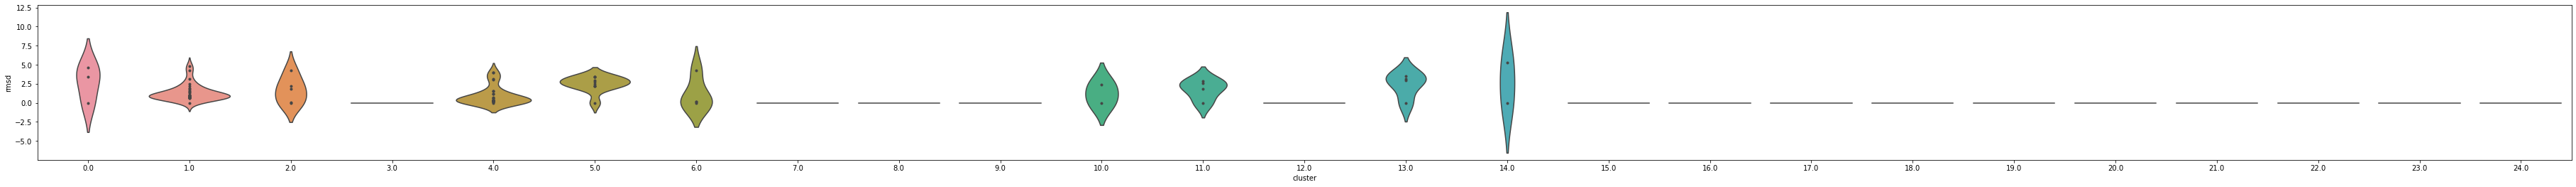

/Users/takabak/work/rna_bgsu/pdb/motif/cluster/triplebase/GCC


0    1    2   3   4    5   6   7   8   9   10  11  12  13
# of samples 2.0 15.0 50.0 5.0 7.0 22.0 7.0 2.0 1.0 1.0 1.0 2.0 6.0 1.0
Avg          1.6  2.4  3.5 3.3 2.5  2.6 0.2 0.3 0.0 0.0 0.0 1.3 1.5 0.0
Std          1.6  2.1  1.6 1.7 1.4  2.2 0.1 0.3 0.0 0.0 0.0 1.3 0.7 0.0
Max          3.3  5.3  5.5 4.5 4.4  5.8 0.4 0.5 0.0 0.0 0.0 2.6 2.2 0.0
Min          0.0  0.0  0.0 0.0 0.0  0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0

<Figure size 432x288 with 0 Axes>

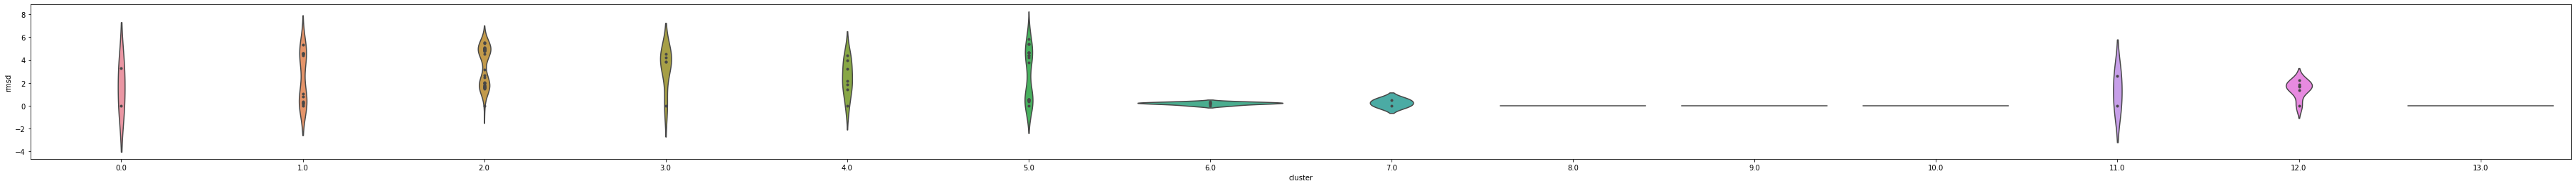

/Users/takabak/work/rna_bgsu/pdb/motif/cluster/triplebase/CCC


0   1   2   3   4   5   6   7   8   9   10  11  12
# of samples 33.0 3.0 4.0 2.0 1.0 6.0 2.0 1.0 1.0 1.0 1.0 1.0 1.0
Avg           1.3 1.1 0.5 1.9 0.0 0.2 0.3 0.0 0.0 0.0 0.0 0.0 0.0
Std           1.1 1.1 0.6 1.9 0.0 0.1 0.3 0.0 0.0 0.0 0.0 0.0 0.0
Max           5.1 2.5 1.6 3.7 0.0 0.4 0.6 0.0 0.0 0.0 0.0 0.0 0.0
Min           0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0

<Figure size 432x288 with 0 Axes>

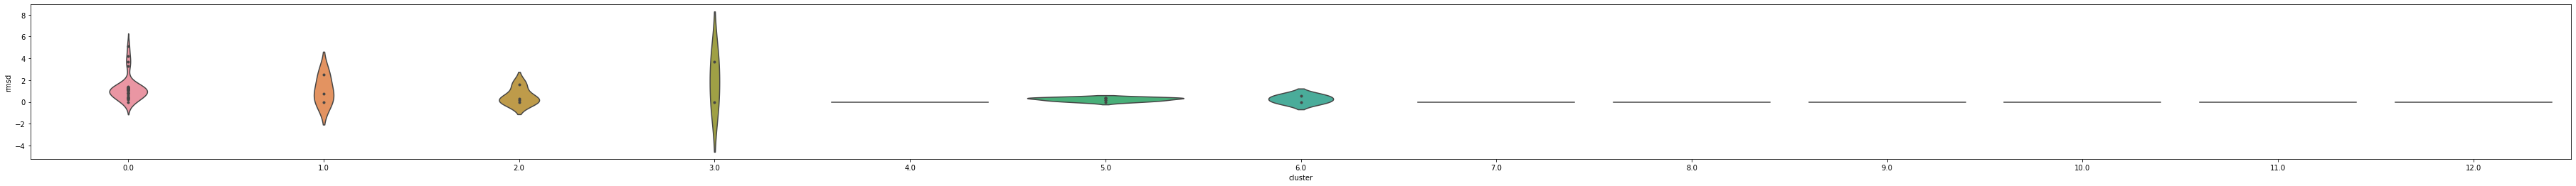

/Users/takabak/work/rna_bgsu/pdb/motif/cluster/triplebase/ACG


0   1   2    3    4    5   6    7   8   9    10  11  12  13  \
# of samples 88.0 3.0 6.0 21.0 90.0 31.0 2.0 19.0 2.0 8.0 11.0 3.0 4.0 1.0   
Avg           3.1 3.1 2.0  1.5  3.9  1.1 2.3  1.6 0.8 0.8  0.7 3.8 3.7 0.0   
Std           1.4 2.4 1.7  1.4  0.7  1.3 2.3  2.1 0.8 1.3  1.1 2.7 2.2 0.0   
Max           5.5 5.8 4.8  5.2  5.5  5.5 4.6  5.7 1.5 4.4  4.1 6.2 5.8 0.0   
Min           0.0 0.0 0.0  0.0  0.0  0.0 0.0  0.0 0.0 0.0  0.0 0.0 0.0 0.0   

              14  15  16  17  18  19  20  21  22  23  24  25  26  27  
# of samples 1.0 1.0 4.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 3.0 1.0  
Avg          0.0 0.0 0.2 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.1 0.0  
Std          0.0 0.0 0.1 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.8 0.0  
Max          0.0 0.0 0.3 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.8 0.0  
Min          0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0

<Figure size 432x288 with 0 Axes>

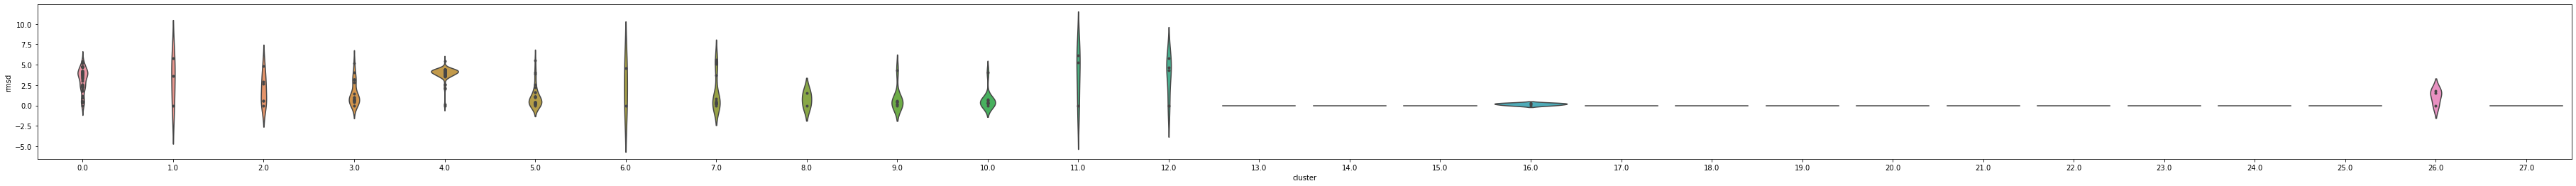

/Users/takabak/work/rna_bgsu/pdb/motif/cluster/triplebase/ACU


0   1   2    3   4   5   6   7   8   9   10  11  12  13  14  15  \
# of samples 2.0 7.0 2.0 27.0 3.0 4.0 2.0 2.0 3.0 1.0 1.0 1.0 2.0 1.0 6.0 1.0   
Avg          1.2 1.9 2.1  0.9 1.2 0.9 2.3 0.3 0.7 0.0 0.0 0.0 0.1 0.0 1.6 0.0   
Std          1.2 1.0 2.1  0.5 0.9 0.9 2.3 0.3 0.8 0.0 0.0 0.0 0.1 0.0 1.1 0.0   
Max          2.4 3.3 4.2  2.9 2.0 2.4 4.7 0.6 1.7 0.0 0.0 0.0 0.2 0.0 2.7 0.0   
Min          0.0 0.0 0.0  0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0   

              16  17  18  19  
# of samples 1.0 1.0 1.0 1.0  
Avg          0.0 0.0 0.0 0.0  
Std          0.0 0.0 0.0 0.0  
Max          0.0 0.0 0.0 0.0  
Min          0.0 0.0 0.0 0.0

<Figure size 432x288 with 0 Axes>

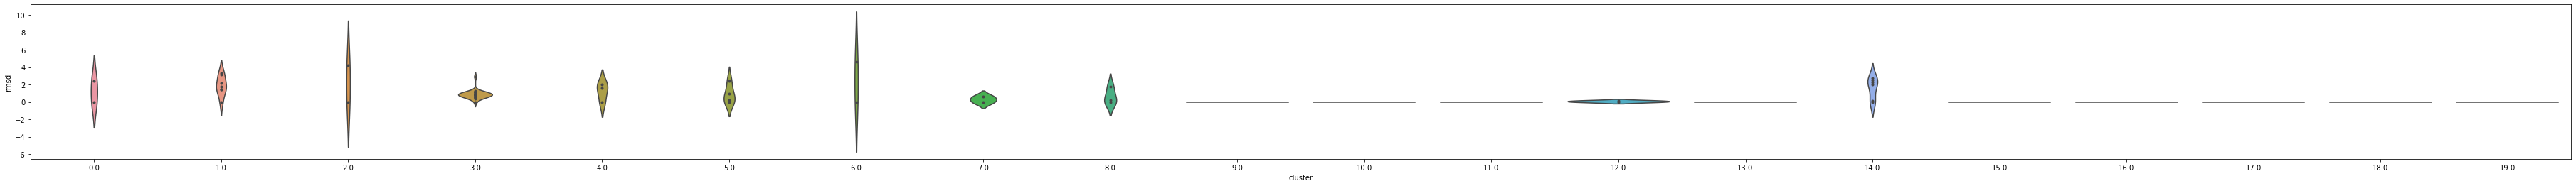

/Users/takabak/work/rna_bgsu/pdb/motif/cluster/triplebase/CGU


0    1    2    3    4    5   6   7   8   9   10  11  12  13  14  \
# of samples 3.0 12.0 11.0 91.0 24.0 37.0 3.0 7.0 3.0 5.0 1.0 2.0 1.0 1.0 6.0   
Avg          2.0  3.1  1.8  1.8  3.0  2.9 0.3 3.1 3.2 0.2 0.0 0.6 0.0 0.0 0.2   
Std          2.3  1.6  2.0  2.0  0.8  2.0 0.2 2.3 2.3 0.1 0.0 0.6 0.0 0.0 0.1   
Max          5.2  5.3  6.0  6.2  3.8  5.7 0.6 5.4 5.4 0.3 0.0 1.2 0.0 0.0 0.3   
Min          0.0  0.0  0.0  0.0  0.0  0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0   

              15  16  17  18  19  
# of samples 1.0 1.0 1.0 1.0 1.0  
Avg          0.0 0.0 0.0 0.0 0.0  
Std          0.0 0.0 0.0 0.0 0.0  
Max          0.0 0.0 0.0 0.0 0.0  
Min          0.0 0.0 0.0 0.0 0.0

<Figure size 432x288 with 0 Axes>

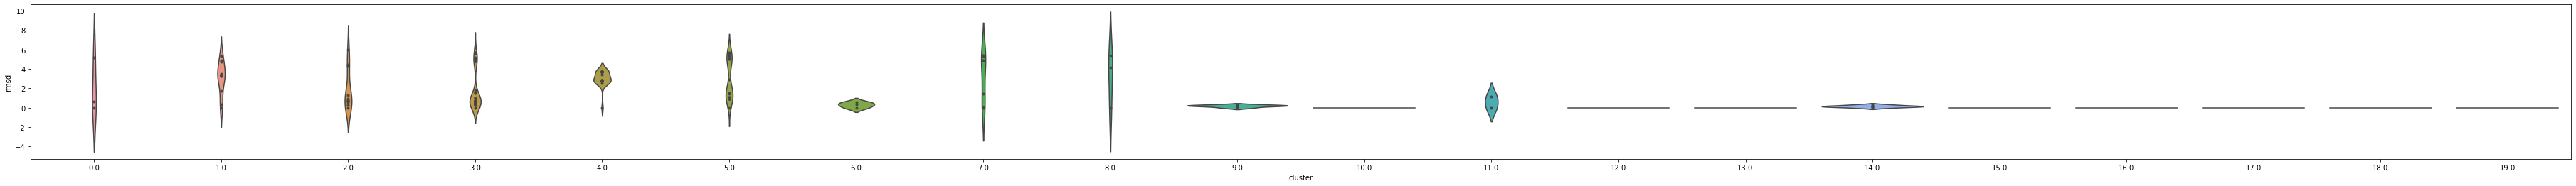

/Users/takabak/work/rna_bgsu/pdb/motif/cluster/triplebase/UUG


0    1   2    3   4   5    6   7   8   9   10  11  12  13  14  \
# of samples 2.0 16.0 2.0 18.0 3.0 4.0 24.0 7.0 7.0 5.0 5.0 1.0 3.0 4.0 9.0   
Avg          2.5  1.6 1.9  2.9 2.8 3.1  2.2 2.7 1.5 2.8 3.2 0.0 2.7 1.8 2.3   
Std          2.5  1.6 1.9  1.2 2.0 2.1  1.1 1.4 1.3 1.5 1.7 0.0 2.3 1.1 1.8   
Max          5.0  5.2 3.7  6.0 4.6 5.7  4.4 4.2 3.9 4.2 4.6 0.0 5.5 2.7 4.8   
Min          0.0  0.0 0.0  0.0 0.0 0.0  0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0   

              15  16  17  18  19   20  21  22  23  24   25  26  27  
# of samples 1.0 2.0 1.0 1.0 1.0 17.0 2.0 2.0 1.0 1.0 13.0 5.0 1.0  
Avg          0.0 2.0 0.0 0.0 0.0  1.2 0.8 1.9 0.0 0.0  1.1 2.2 0.0  
Std          0.0 2.0 0.0 0.0 0.0  1.1 0.8 1.9 0.0 0.0  1.7 1.7 0.0  
Max          0.0 3.9 0.0 0.0 0.0  4.3 1.6 3.8 0.0 0.0  5.1 4.4 0.0  
Min          0.0 0.0 0.0 0.0 0.0  0.0 0.0 0.0 0.0 0.0  0.0 0.0 0.0

<Figure size 432x288 with 0 Axes>

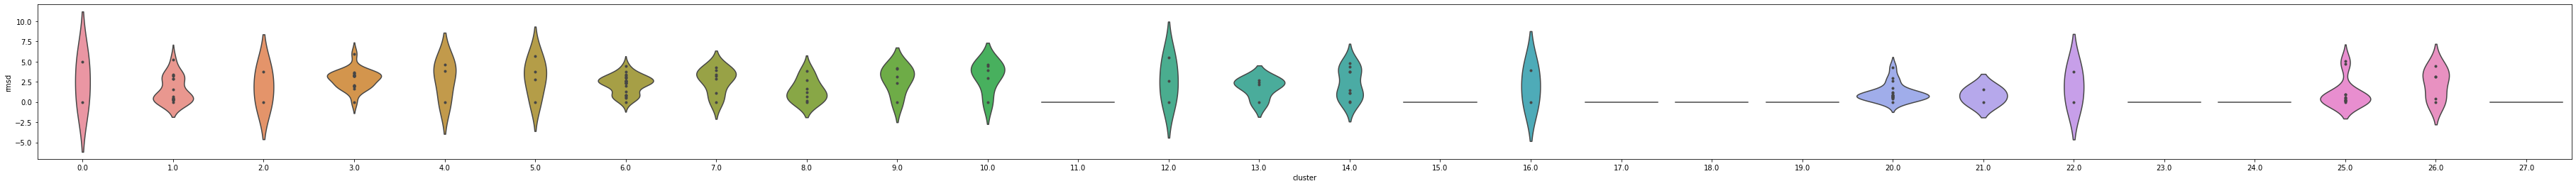

/Users/takabak/work/rna_bgsu/pdb/motif/cluster/triplebase/AAA


0    1   2   3   4    5    6   7    8   9   10  11  12  13  14  \
# of samples 2.0 17.0 4.0 9.0 8.0 10.0 12.0 2.0 11.0 4.0 5.0 3.0 2.0 2.0 5.0   
Avg          2.3  1.3 2.4 0.7 2.8  2.1  3.8 1.2  2.6 1.5 1.7 2.4 1.7 1.0 2.6   
Std          2.3  1.5 1.8 1.2 1.2  1.0  1.3 1.2  1.5 1.8 1.7 1.7 1.7 1.0 1.9   
Max          4.5  5.5 4.9 4.0 4.2  3.8  5.6 2.3  4.9 4.5 4.2 4.1 3.4 2.1 4.5   
Min          0.0  0.0 0.0 0.0 0.0  0.0  0.0 0.0  0.0 0.0 0.0 0.0 0.0 0.0 0.0   

               15  16   17  18  19  20  21  22  23  24   25  26  27  28  29  \
# of samples 18.0 2.0 87.0 3.0 6.0 4.0 9.0 2.0 2.0 1.0 19.0 1.0 1.0 2.0 1.0   
Avg           1.2 1.5  1.5 0.9 2.9 2.7 0.8 2.1 1.0 0.0  2.7 0.0 0.0 0.1 0.0   
Std           1.5 1.5  0.8 1.1 2.0 1.9 1.7 2.1 1.0 0.0  1.8 0.0 0.0 0.1 0.0   
Max           3.9 3.0  4.8 2.5 4.7 5.4 5.6 4.1 2.1 0.0  5.6 0.0 0.0 0.2 0.0   
Min           0.0 0.0  0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0  0.0 0.0 0.0 0.0 0.0   

              30  31  32  33  34   35  36  37  38  39  40  41  42  43  44  45  \
# of samples 2.0 1.0 1.0 2.0 1.0 46.0 1.0 3.0 6.0 1.0 9.0 2.0 2.0 1.0 2.0 1.0   
Avg          1.6 0.0 0.0 0.6 0.0  1.2 0.0 1.8 2.1 0.0 2.0 1.8 0.7 0.0 0.9 0.0   
Std          1.6 0.0 0.0 0.6 0.0  1.0 0.0 1.6 1.5 0.0 2.1 1.8 0.7 0.0 0.9 0.0   
Max          3.1 0.0 0.0 1.2 0.0  3.8 0.0 3.9 4.2 0.0 4.8 3.6 1.3 0.0 1.7 0.0   
Min          0.0 0.0 0.0 0.0 0.0  0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0   

              46  47  
# of samples 1.0 4.0  
Avg          0.0 0.4  
Std          0.0 0.4  
Max          0.0 1.1  
Min          0.0 0.0

<Figure size 432x288 with 0 Axes>

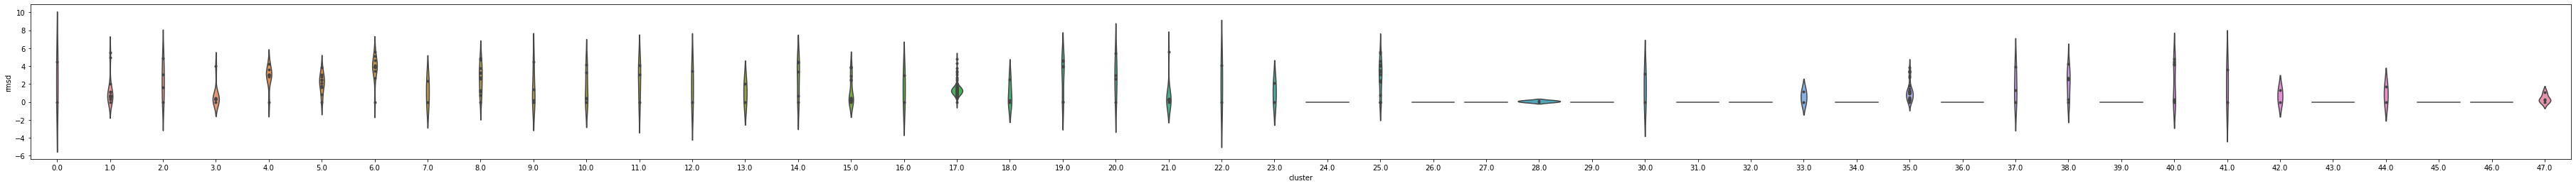

/Users/takabak/work/rna_bgsu/pdb/motif/cluster/triplebase/GGA


0   1   2   3   4   5    6    7    8   9   10  11  12  13   14  \
# of samples 4.0 5.0 2.0 3.0 4.0 2.0 12.0 77.0 11.0 8.0 2.0 3.0 8.0 2.0 38.0   
Avg          2.5 1.8 2.3 2.4 3.2 1.0  1.9  2.6  3.1 2.1 1.8 1.8 1.5 2.0  2.3   
Std          2.5 1.5 2.3 1.8 2.0 1.0  1.7  1.2  2.5 1.6 1.8 1.9 1.8 2.0  1.2   
Max          5.7 3.4 4.6 4.2 5.6 2.0  5.0  4.7  6.0 4.1 3.5 4.4 4.6 4.0  4.7   
Min          0.0 0.0 0.0 0.0 0.0 0.0  0.0  0.0  0.0 0.0 0.0 0.0 0.0 0.0  0.0   

               15  16  17  18  19  20  21  22  23  24  25  26  27   28   29  \
# of samples 14.0 4.0 2.0 2.0 2.0 1.0 1.0 1.0 1.0 7.0 1.0 3.0 4.0 14.0 34.0   
Avg           0.5 2.7 1.4 1.6 1.8 0.0 0.0 0.0 0.0 2.9 0.0 1.1 0.2  0.9  2.2   
Std           0.4 2.5 1.4 1.6 1.8 0.0 0.0 0.0 0.0 1.5 0.0 0.8 0.1  1.2  0.9   
Max           1.9 5.2 2.8 3.2 3.5 0.0 0.0 0.0 0.0 5.0 0.0 1.9 0.3  3.4  5.7   
Min           0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0  0.0  0.0   

              30  31  32  33  34  35  
# of samples 2.0 1.0 1.0 1.0 4.0 1.0  
Avg          1.0 0.0 0.0 0.0 1.9 0.0  
Std          1.0 0.0 0.0 0.0 1.1 0.0  
Max          2.0 0.0 0.0 0.0 2.9 0.0  
Min          0.0 0.0 0.0 0.0 0.0 0.0

<Figure size 432x288 with 0 Axes>

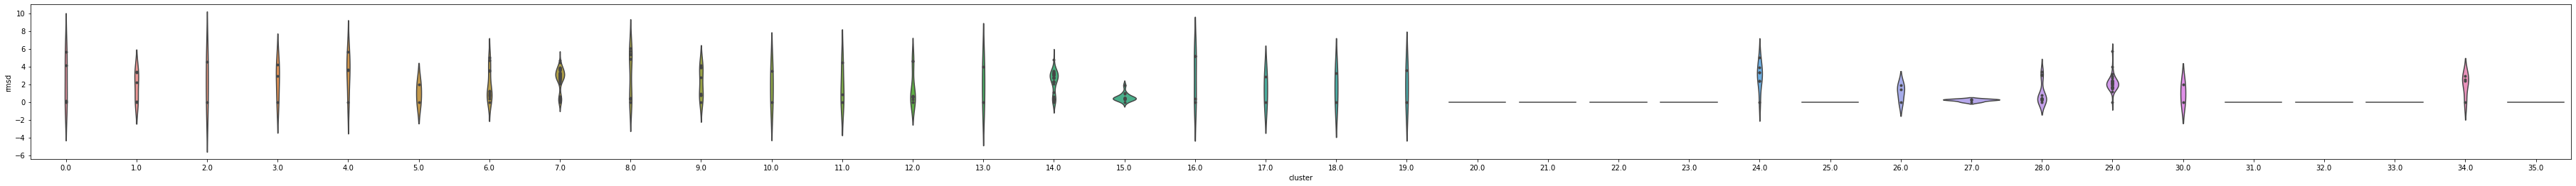

/Users/takabak/work/rna_bgsu/pdb/motif/cluster/triplebase/AGC


0   1    2   3    4    5     6   7    8   9   10  11  12   13  \
# of samples 5.0 7.0 85.0 4.0 41.0 36.0 134.0 3.0 19.0 6.0 7.0 6.0 4.0 21.0   
Avg          3.3 3.5  1.1 1.4  2.4  1.4   2.8 2.1  0.8 1.8 3.7 4.0 1.3  1.9   
Std          1.9 1.5  1.1 2.3  1.9  0.8   1.2 2.8  0.8 2.5 3.3 2.0 1.5  1.8   
Max          5.2 5.2  5.7 5.3  5.8  3.3   5.1 6.1  4.0 5.3 7.9 5.8 3.9  5.8   
Min          0.0 0.0  0.0 0.0  0.0  0.0   0.0 0.0  0.0 0.0 0.0 0.0 0.0  0.0   

              14  15  16  17  18  19  20  21  22  23  24  25  26   27  
# of samples 9.0 1.0 1.0 1.0 5.0 1.0 1.0 1.0 2.0 1.0 2.0 1.0 2.0 12.0  
Avg          1.5 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.2 0.0 1.8  2.2  
Std          1.4 0.0 0.0 0.0 1.5 0.0 0.0 0.0 0.0 0.0 0.2 0.0 1.8  2.4  
Max          3.0 0.0 0.0 0.0 3.9 0.0 0.0 0.0 0.1 0.0 0.5 0.0 3.6  5.1  
Min          0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0  0.0

<Figure size 432x288 with 0 Axes>

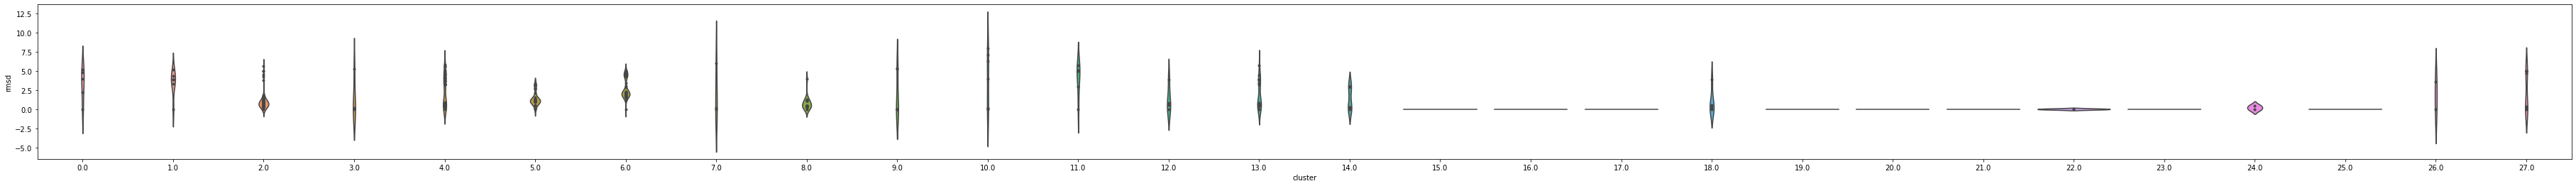

/Users/takabak/work/rna_bgsu/pdb/motif/cluster/triplebase/GAC


0    1    2    3   4   5   6   7   8   9    10   11  12  13  14  \
# of samples 7.0 11.0 19.0 10.0 7.0 2.0 2.0 2.0 3.0 5.0 41.0 29.0 1.0 1.0 1.0   
Avg          3.4  2.7  1.3  2.8 3.6 2.1 2.2 1.9 3.0 2.3  1.0  1.2 0.0 0.0 0.0   
Std          1.6  1.0  1.4  1.6 1.6 2.1 2.2 1.9 2.2 1.8  0.9  1.6 0.0 0.0 0.0   
Max          4.6  4.0  4.0  5.0 5.1 4.2 4.5 3.8 5.2 4.7  4.1  5.2 0.0 0.0 0.0   
Min          0.0  0.0  0.0  0.0 0.0 0.0 0.0 0.0 0.0 0.0  0.0  0.0 0.0 0.0 0.0   

              15   16  17   18  19  20  21  22  
# of samples 2.0 11.0 1.0 14.0 2.0 2.0 1.0 2.0  
Avg          0.8  2.0 0.0  0.4 0.6 1.4 0.0 2.0  
Std          0.8  1.4 0.0  0.2 0.6 1.4 0.0 2.0  
Max          1.7  3.9 0.0  0.9 1.2 2.8 0.0 4.0  
Min          0.0  0.0 0.0  0.0 0.0 0.0 0.0 0.0

<Figure size 432x288 with 0 Axes>

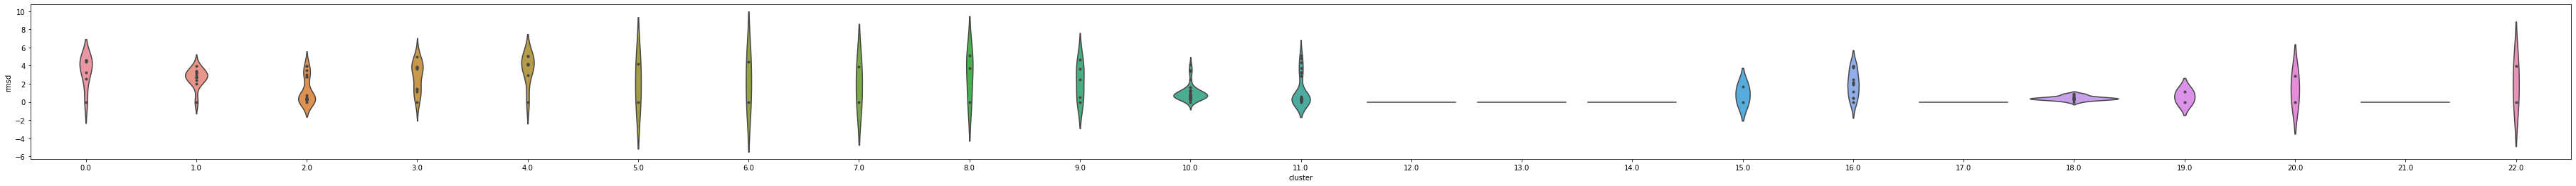

/Users/takabak/work/rna_bgsu/pdb/motif/cluster/triplebase/CGG


0    1   2   3   4   5   6   7     8    9    10  11  12  13  14  \
# of samples 3.0 14.0 5.0 4.0 2.0 3.0 2.0 6.0 129.0 11.0 30.0 2.0 5.0 5.0 3.0   
Avg          1.4  3.5 1.3 2.3 2.3 3.1 1.3 1.9   1.9  2.0  3.2 2.3 2.2 0.9 0.4   
Std          1.9  1.8 2.3 1.4 2.3 2.2 1.3 1.7   1.6  2.3  2.2 2.3 2.1 1.1 0.5   
Max          4.0  5.4 5.9 3.6 4.5 5.1 2.7 4.5   5.3  6.0  6.4 4.6 5.6 2.2 1.1   
Min          0.0  0.0 0.0 0.0 0.0 0.0 0.0 0.0   0.0  0.0  0.0 0.0 0.0 0.0 0.0   

              15  16  17  18  19  20  21  22  23  24  25   26  27  28  29  30  \
# of samples 7.0 4.0 1.0 2.0 1.0 1.0 2.0 1.0 7.0 1.0 1.0 17.0 1.0 2.0 1.0 1.0   
Avg          2.6 0.2 0.0 2.1 0.0 0.0 0.1 0.0 2.5 0.0 0.0  2.0 0.0 0.1 0.0 0.0   
Std          2.1 0.1 0.0 2.1 0.0 0.0 0.1 0.0 1.6 0.0 0.0  2.3 0.0 0.1 0.0 0.0   
Max          5.6 0.4 0.0 4.2 0.0 0.0 0.1 0.0 4.1 0.0 0.0  5.8 0.0 0.2 0.0 0.0   
Min          0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0  0.0 0.0 0.0 0.0 0.0   

              31  32  
# of samples 1.0 1.0  
Avg          0.0 0.0  
Std          0.0 0.0  
Max          0.0 0.0  
Min          0.0 0.0

<Figure size 432x288 with 0 Axes>

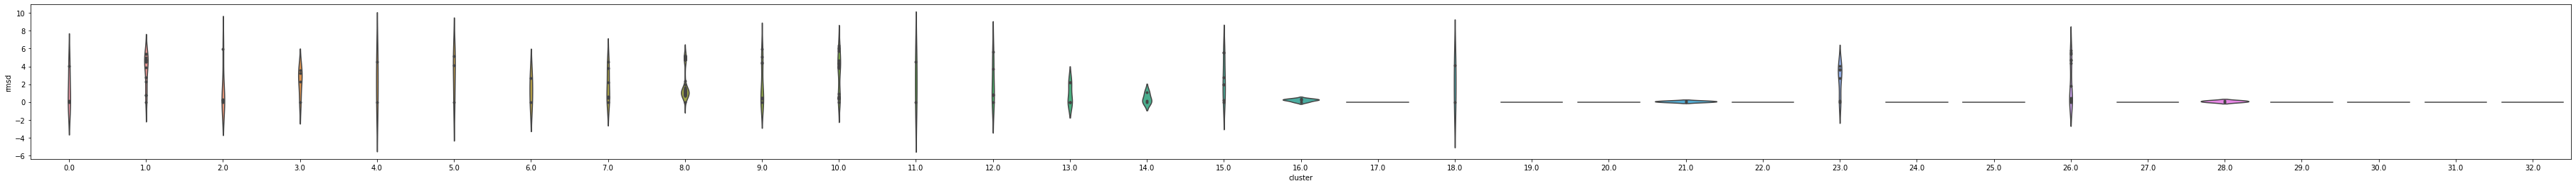

/Users/takabak/work/rna_bgsu/pdb/motif/cluster/triplebase/UUU


0   1   2   3   4   5    6   7   8    9    10  11  12  13  14  \
# of samples 3.0 4.0 3.0 4.0 3.0 8.0 10.0 2.0 3.0 10.0 37.0 7.0 3.0 1.0 2.0   
Avg          2.7 3.1 2.1 2.9 1.9 2.9  1.3 2.1 2.3  1.5  0.9 0.5 2.7 0.0 1.5   
Std          2.0 1.9 1.5 1.7 1.4 1.2  1.3 2.1 1.6  1.1  0.9 0.6 1.9 0.0 1.5   
Max          4.8 5.2 3.1 4.3 3.3 4.3  3.2 4.1 3.7  3.5  3.8 1.6 4.4 0.0 3.1   
Min          0.0 0.0 0.0 0.0 0.0 0.0  0.0 0.0 0.0  0.0  0.0 0.0 0.0 0.0 0.0   

              15  16  17  18  19  20  21  22  23  24  25  26  27  
# of samples 1.0 2.0 2.0 3.0 7.0 1.0 1.0 1.0 1.0 4.0 1.0 1.0 1.0  
Avg          0.0 0.8 1.6 0.8 2.6 0.0 0.0 0.0 0.0 1.8 0.0 0.0 0.0  
Std          0.0 0.8 1.6 0.8 1.1 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0  
Max          0.0 1.5 3.3 1.9 3.5 0.0 0.0 0.0 0.0 2.6 0.0 0.0 0.0  
Min          0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0

<Figure size 432x288 with 0 Axes>

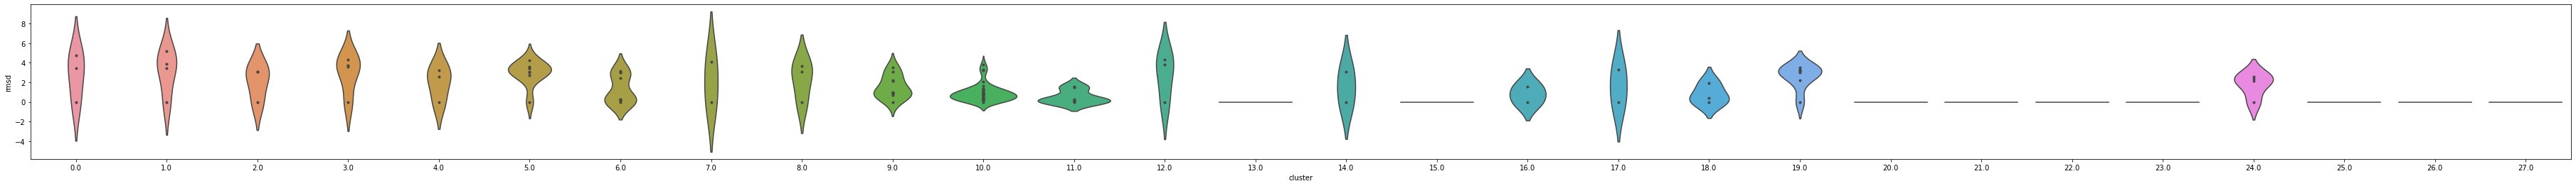

/Users/takabak/work/rna_bgsu/pdb/motif/cluster/triplebase/GGG


0   1    2   3    4   5   6   7   8   9   10  11  12  13  14  \
# of samples 2.0 2.0 43.0 2.0 16.0 2.0 4.0 3.0 2.0 2.0 3.0 1.0 1.0 1.0 2.0   
Avg          1.0 2.3  1.4 1.3  1.8 2.5 2.6 0.5 0.5 1.4 0.2 0.0 0.0 0.0 1.7   
Std          1.0 2.3  0.9 1.3  1.0 2.5 2.1 0.4 0.5 1.4 0.1 0.0 0.0 0.0 1.7   
Max          2.0 4.7  4.5 2.7  4.2 5.1 4.8 0.9 1.0 2.7 0.3 0.0 0.0 0.0 3.3   
Min          0.0 0.0  0.0 0.0  0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0   

              15  16  17  18  19  20  21  22  23  24  25  
# of samples 1.0 1.0 1.0 1.0 1.0 3.0 1.0 1.0 1.0 1.0 1.0  
Avg          0.0 0.0 0.0 0.0 0.0 2.4 0.0 0.0 0.0 0.0 0.0  
Std          0.0 0.0 0.0 0.0 0.0 1.8 0.0 0.0 0.0 0.0 0.0  
Max          0.0 0.0 0.0 0.0 0.0 4.1 0.0 0.0 0.0 0.0 0.0  
Min          0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0

<Figure size 432x288 with 0 Axes>

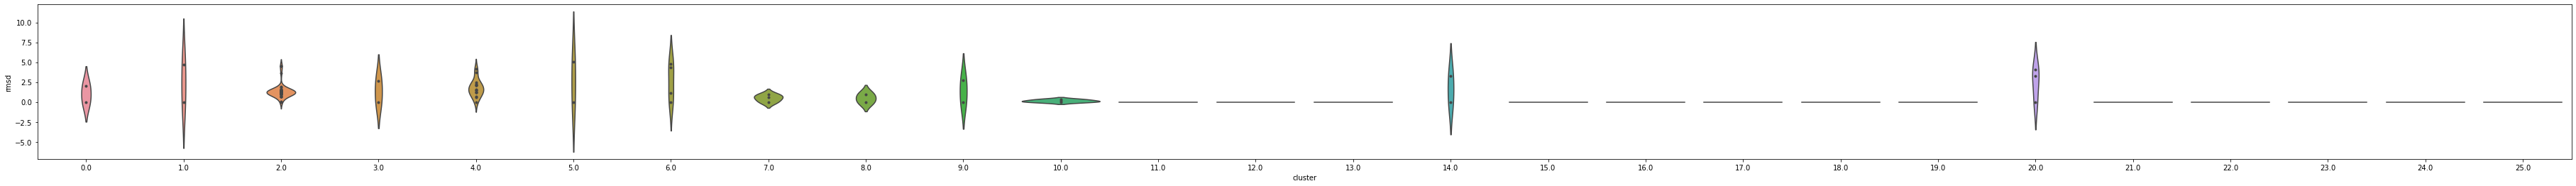

/Users/takabak/work/rna_bgsu/pdb/motif/cluster/triplebase/CAC


0   1   2   3   4   5    6   7    8   9   10  11  12  13  14  \
# of samples 12.0 5.0 5.0 2.0 2.0 6.0 12.0 3.0 39.0 4.0 1.0 1.0 3.0 2.0 1.0   
Avg           2.9 2.8 1.9 1.6 2.7 1.0  2.4 2.2  1.1 2.6 0.0 0.0 0.1 0.2 0.0   
Std           1.1 2.0 1.7 1.6 2.7 1.0  1.0 2.0  0.6 1.5 0.0 0.0 0.1 0.2 0.0   
Max           5.3 5.3 4.5 3.1 5.4 2.2  3.7 4.9  3.2 3.8 0.0 0.0 0.2 0.4 0.0   
Min           0.0 0.0 0.0 0.0 0.0 0.0  0.0 0.0  0.0 0.0 0.0 0.0 0.0 0.0 0.0   

              15  16  17  18  19  
# of samples 1.0 2.0 1.0 1.0 1.0  
Avg          0.0 0.5 0.0 0.0 0.0  
Std          0.0 0.5 0.0 0.0 0.0  
Max          0.0 1.0 0.0 0.0 0.0  
Min          0.0 0.0 0.0 0.0 0.0

<Figure size 432x288 with 0 Axes>

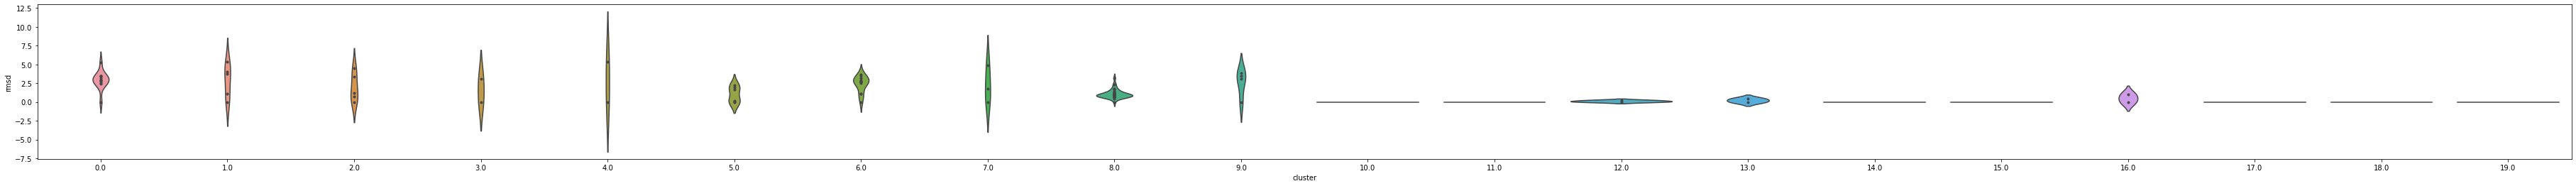

/Users/takabak/work/rna_bgsu/pdb/motif/cluster/triplebase/AAG


0   1   2   3    4    5   6   7   8   9   10  11  12   13   14  \
# of samples 5.0 3.0 2.0 8.0 65.0 39.0 2.0 3.0 2.0 2.0 3.0 5.0 4.0 12.0 15.0   
Avg          2.9 3.8 1.6 3.2  1.8  2.2 2.2 3.1 2.3 2.1 1.2 2.3 1.5  3.0  1.1   
Std          2.3 2.7 1.6 1.5  1.4  1.8 2.2 2.3 2.3 2.1 1.6 1.4 1.1  1.1  1.6   
Max          6.1 5.9 3.1 5.7  5.2  5.3 4.4 5.5 4.6 4.1 3.4 3.9 3.2  4.5  6.1   
Min          0.0 0.0 0.0 0.0  0.0  0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0  0.0  0.0   

              15   16  17   18  19  20  21  22  23  24  25   26    27  28  29  \
# of samples 2.0 12.0 5.0 15.0 1.0 4.0 1.0 1.0 6.0 8.0 4.0 12.0 141.0 1.0 2.0   
Avg          1.0  1.4 0.5  2.7 0.0 1.3 0.0 0.0 1.4 3.4 1.4  1.7   1.0 0.0 1.5   
Std          1.0  1.5 0.5  1.8 0.0 1.0 0.0 0.0 1.2 1.6 1.2  1.3   0.7 0.0 1.5   
Max          2.0  4.9 1.3  5.3 0.0 2.5 0.0 0.0 3.6 5.4 3.1  3.6   4.1 0.0 3.1   
Min          0.0  0.0 0.0  0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0  0.0   0.0 0.0 0.0   

              30  31  32  33  34  35   36  37  38  39  
# of samples 1.0 1.0 4.0 1.0 2.0 1.0 14.0 1.0 3.0 1.0  
Avg          0.0 0.0 2.3 0.0 0.1 0.0  1.7 0.0 0.8 0.0  
Std          0.0 0.0 1.5 0.0 0.1 0.0  1.0 0.0 1.0 0.0  
Max          0.0 0.0 3.8 0.0 0.2 0.0  4.3 0.0 2.2 0.0  
Min          0.0 0.0 0.0 0.0 0.0 0.0  0.0 0.0 0.0 0.0

<Figure size 432x288 with 0 Axes>

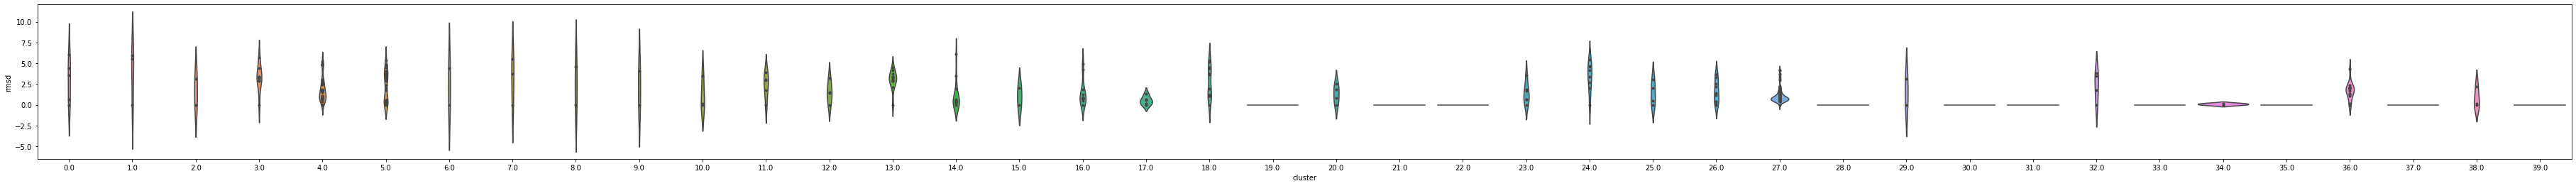

/Users/takabak/work/rna_bgsu/pdb/motif/cluster/triplebase/UUA


0   1    2   3   4   5    6   7   8    9   10  11  12  13   14  \
# of samples 3.0 5.0 15.0 9.0 4.0 4.0 62.0 4.0 3.0 20.0 4.0 2.0 4.0 2.0 16.0   
Avg          2.6 2.6  3.3 2.9 2.3 2.7  2.2 1.8 2.0  1.5 2.5 2.4 1.3 2.0  0.7   
Std          1.9 1.6  1.1 1.8 2.2 1.6  2.2 1.5 1.8  1.4 1.9 2.4 1.0 2.0  0.8   
Max          4.2 4.2  4.2 5.5 4.6 4.0  5.8 4.2 4.4  3.7 4.4 4.7 2.3 4.0  3.2   
Min          0.0 0.0  0.0 0.0 0.0 0.0  0.0 0.0 0.0  0.0 0.0 0.0 0.0 0.0  0.0   

              15   16  17  18  19  20  21  22   23  24  25  26  27  28  29  \
# of samples 1.0 14.0 1.0 1.0 1.0 5.0 2.0 2.0 16.0 7.0 3.0 2.0 3.0 9.0 1.0   
Avg          0.0  2.5 0.0 0.0 0.0 1.8 2.1 0.1  1.2 0.8 2.3 1.5 1.6 2.0 0.0   
Std          0.0  1.1 0.0 0.0 0.0 1.6 2.1 0.1  1.2 0.5 1.6 1.5 1.8 1.3 0.0   
Max          0.0  4.2 0.0 0.0 0.0 3.8 4.1 0.2  4.2 1.8 3.8 3.0 4.1 3.9 0.0   
Min          0.0  0.0 0.0 0.0 0.0 0.0 0.0 0.0  0.0 0.0 0.0 0.0 0.0 0.0 0.0   

              30  31  
# of samples 1.0 1.0  
Avg          0.0 0.0  
Std          0.0 0.0  
Max          0.0 0.0  
Min          0.0 0.0

<Figure size 432x288 with 0 Axes>

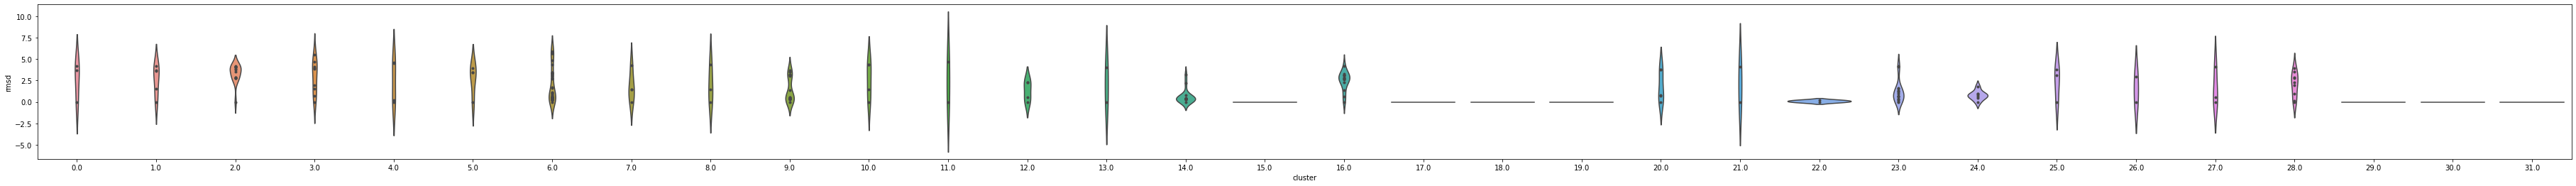

/Users/takabak/work/rna_bgsu/pdb/motif/cluster/triplebase/CGA


0   1   2   3    4    5    6   7     8   9    10  11  12  13  \
# of samples 38.0 8.0 7.0 5.0 52.0 10.0 15.0 2.0 149.0 9.0 19.0 3.0 5.0 1.0   
Avg           3.0 2.5 1.8 2.8  3.8  3.1  0.9 1.5   3.7 1.9  1.4 1.7 2.3 0.0   
Std           1.4 1.8 1.6 1.5  1.6  1.6  1.6 1.5   1.1 2.4  0.8 1.8 2.6 0.0   
Max           5.3 4.8 5.2 4.7  6.0  5.4  5.1 3.0   5.7 5.4  4.1 4.1 5.6 0.0   
Min           0.0 0.0 0.0 0.0  0.0  0.0  0.0 0.0   0.0 0.0  0.0 0.0 0.0 0.0   

              14   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  \
# of samples 1.0 10.0 1.0 5.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 2.0 1.0 1.0 1.0   
Avg          0.0  2.0 0.0 0.8 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.1 0.0 0.0 0.0   
Std          0.0  1.4 0.0 0.9 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.1 0.0 0.0 0.0   
Max          0.0  5.8 0.0 2.6 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.2 0.0 0.0 0.0   
Min          0.0  0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0   

              30  31   32  33  
# of samples 1.0 1.0 10.0 1.0  
Avg          0.0 0.0  1.6 0.0  
Std          0.0 0.0  1.8 0.0  
Max          0.0 0.0  5.5 0.0  
Min          0.0 0.0  0.0 0.0

<Figure size 432x288 with 0 Axes>

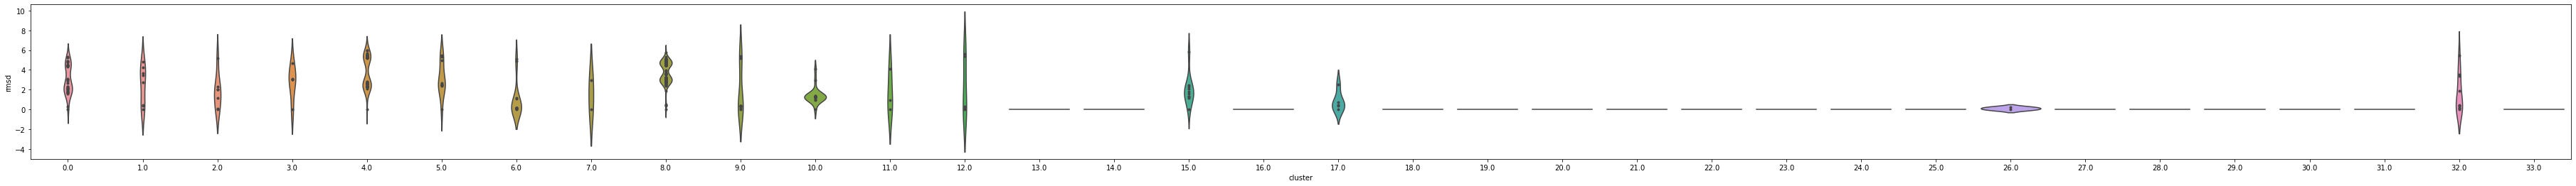

/Users/takabak/work/rna_bgsu/pdb/motif/cluster/triplebase/AAU


0   1    2   3   4   5   6   7   8    9    10  11  12   13  \
# of samples 13.0 4.0 39.0 4.0 2.0 4.0 9.0 2.0 4.0 10.0 12.0 1.0 1.0 72.0   
Avg           2.9 2.5  1.7 3.7 2.4 2.8 2.5 2.0 2.7  3.4  3.7 0.0 0.0  2.1   
Std           1.7 2.4  1.3 2.2 2.4 2.0 1.2 2.0 1.9  3.1  1.4 0.0 0.0  1.5   
Max           5.2 6.0  4.6 5.2 4.7 5.4 3.4 4.0 5.3  7.3  5.6 0.0 0.0  4.6   
Min           0.0 0.0  0.0 0.0 0.0 0.0 0.0 0.0 0.0  0.0  0.0 0.0 0.0  0.0   

               14  15   16  17  18  19  20  21  22  23  24  25  26  27  28  \
# of samples 25.0 2.0 17.0 2.0 6.0 6.0 1.0 8.0 1.0 1.0 1.0 1.0 1.0 1.0 3.0   
Avg           0.8 1.1  1.0 2.0 2.7 0.7 0.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.3   
Std           1.3 1.1  1.0 2.0 1.3 0.3 0.0 2.4 0.0 0.0 0.0 0.0 0.0 0.0 0.2   
Max           5.2 2.2  2.9 4.0 3.6 1.0 0.0 5.6 0.0 0.0 0.0 0.0 0.0 0.0 0.5   
Min           0.0 0.0  0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0   

              29  30  31  32  33  34  35  36  37  38  
# of samples 2.0 2.0 2.0 3.0 1.0 2.0 1.0 1.0 1.0 2.0  
Avg          1.6 1.2 0.5 0.1 0.0 1.2 0.0 0.0 0.0 1.7  
Std          1.6 1.2 0.5 0.1 0.0 1.2 0.0 0.0 0.0 1.7  
Max          3.3 2.3 1.0 0.2 0.0 2.4 0.0 0.0 0.0 3.4  
Min          0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0

<Figure size 432x288 with 0 Axes>

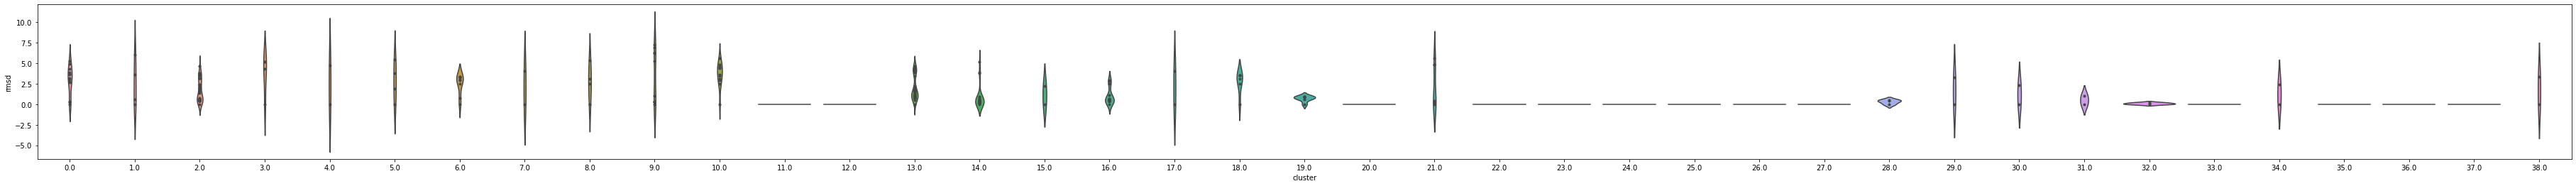

/Users/takabak/work/rna_bgsu/pdb/motif/cluster/triplebase/GGU


0   1    2    3   4   5   6   7   8   9    10   11  12  13  14  \
# of samples 4.0 5.0 13.0 41.0 2.0 3.0 2.0 2.0 3.0 3.0 12.0 10.0 3.0 1.0 2.0   
Avg          2.6 3.0  2.6  1.3 2.3 1.7 2.6 2.9 2.0 1.7  1.4  2.1 1.6 0.0 0.4   
Std          2.2 1.6  2.3  1.0 2.3 1.5 2.6 2.9 1.4 2.4  1.4  1.3 1.3 0.0 0.4   
Max          4.9 4.6  6.0  5.2 4.5 3.6 5.1 5.7 3.0 5.1  4.3  3.7 3.1 0.0 0.9   
Min          0.0 0.0  0.0  0.0 0.0 0.0 0.0 0.0 0.0 0.0  0.0  0.0 0.0 0.0 0.0   

              15  16  17  18  19  20  21  22  23  24  25  26  
# of samples 1.0 9.0 1.0 6.0 1.0 2.0 1.0 1.0 2.0 1.0 1.0 1.0  
Avg          0.0 1.6 0.0 1.9 0.0 1.2 0.0 0.0 0.6 0.0 0.0 0.0  
Std          0.0 1.5 0.0 1.0 0.0 1.2 0.0 0.0 0.6 0.0 0.0 0.0  
Max          0.0 4.8 0.0 3.0 0.0 2.5 0.0 0.0 1.2 0.0 0.0 0.0  
Min          0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0

<Figure size 432x288 with 0 Axes>

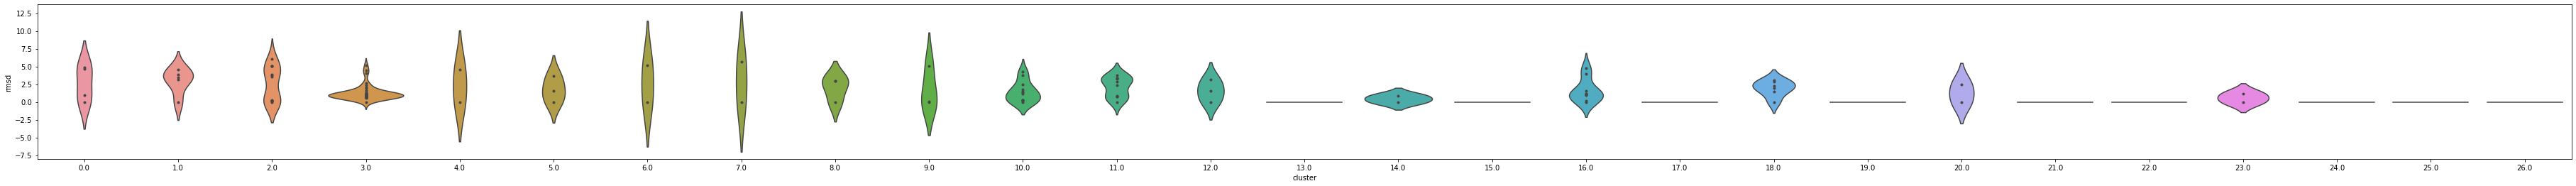

/Users/takabak/work/rna_bgsu/pdb/motif/cluster/triplebase/CUA


0    1   2   3   4    5    6    7    8   9   10  11  12  13  14  \
# of samples 4.0 66.0 6.0 8.0 3.0 20.0 17.0 18.0 10.0 1.0 2.0 1.0 7.0 4.0 5.0   
Avg          1.9  1.6 2.9 1.7 1.7  1.5  4.5  2.5  1.8 0.0 1.7 0.0 1.7 0.7 1.1   
Std          1.3  1.3 1.9 2.4 2.3  1.6  1.6  1.8  1.9 0.0 1.7 0.0 0.8 0.9 0.6   
Max          3.6  4.3 4.6 6.0 5.0  5.2  5.9  4.9  4.6 0.0 3.5 0.0 2.8 2.3 1.6   
Min          0.0  0.0 0.0 0.0 0.0  0.0  0.0  0.0  0.0 0.0 0.0 0.0 0.0 0.0 0.0   

              15  16  17  18  19  20  21  22  23  24  25  26  27  28  
# of samples 1.0 2.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 2.0 1.0 1.0 1.0  
Avg          0.0 0.1 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 2.6 0.0 0.0 0.0  
Std          0.0 0.1 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 2.6 0.0 0.0 0.0  
Max          0.0 0.2 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 5.2 0.0 0.0 0.0  
Min          0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0

<Figure size 432x288 with 0 Axes>

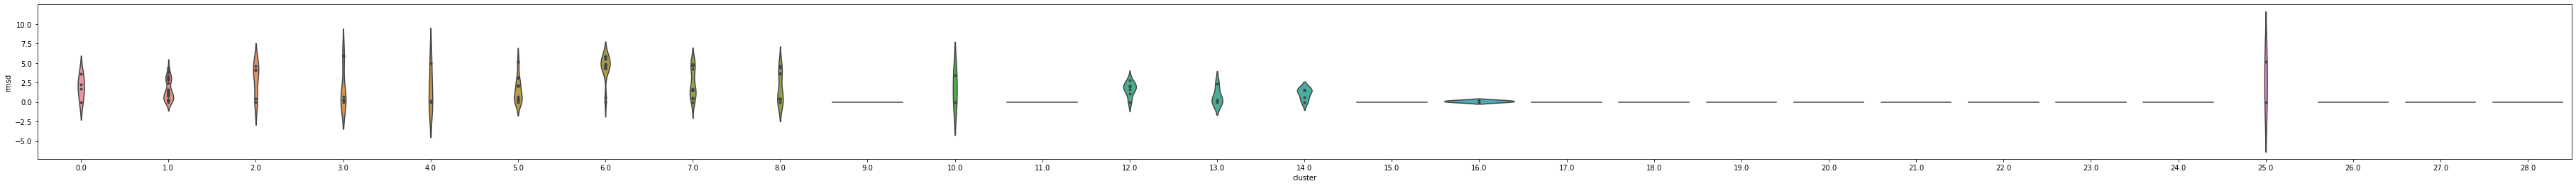

/Users/takabak/work/rna_bgsu/pdb/motif/cluster/triplebase/GUU


0    1   2   3   4    5   6    7    8    9   10  11  12  13  14  \
# of samples 2.0 11.0 5.0 5.0 6.0 10.0 4.0 11.0 16.0 22.0 4.0 1.0 4.0 1.0 2.0   
Avg          3.0  1.6 2.2 3.2 3.2  3.2 2.3  1.1  1.0  1.4 2.9 0.0 2.7 0.0 2.4   
Std          3.0  1.8 1.8 1.7 2.1  1.2 1.4  1.6  1.3  1.5 2.1 0.0 2.0 0.0 2.4   
Max          5.9  5.9 5.1 4.6 5.8  4.4 3.9  4.8  4.3  5.3 5.0 0.0 5.2 0.0 4.8   
Min          0.0  0.0 0.0 0.0 0.0  0.0 0.0  0.0  0.0  0.0 0.0 0.0 0.0 0.0 0.0   

              15  16   17  18  19  20  21  22  
# of samples 1.0 1.0 31.0 8.0 3.0 1.0 2.0 1.0  
Avg          0.0 0.0  1.9 3.7 2.6 0.0 1.2 0.0  
Std          0.0 0.0  1.9 1.5 1.8 0.0 1.2 0.0  
Max          0.0 0.0  5.1 4.6 4.1 0.0 2.4 0.0  
Min          0.0 0.0  0.0 0.0 0.0 0.0 0.0 0.0

<Figure size 432x288 with 0 Axes>

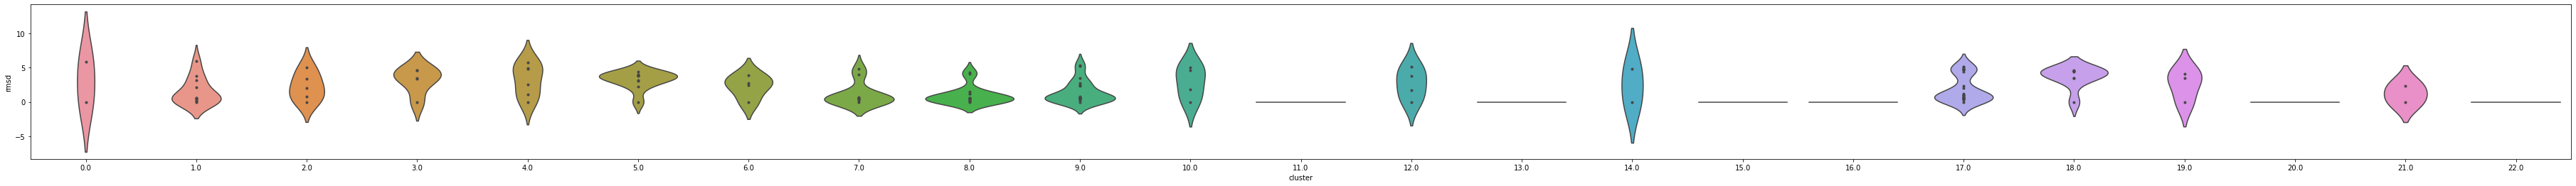

/Users/takabak/work/rna_bgsu/pdb/motif/cluster/triplebase/UAC


0   1   2   3   4    5   6   7   8    9   10  11  12   13  14  \
# of samples 24.0 3.0 4.0 4.0 5.0 21.0 2.0 1.0 9.0 11.0 2.0 2.0 1.0 56.0 1.0   
Avg           2.3 1.1 0.8 1.2 2.7  1.2 1.7 0.0 1.2  2.0 2.1 0.1 0.0  2.0 0.0   
Std           1.9 1.4 1.1 1.7 1.6  1.3 1.7 0.0 1.3  1.4 2.1 0.1 0.0  1.6 0.0   
Max           7.2 3.1 2.7 4.1 4.2  3.9 3.4 0.0 4.7  4.2 4.1 0.1 0.0  5.2 0.0   
Min           0.0 0.0 0.0 0.0 0.0  0.0 0.0 0.0 0.0  0.0 0.0 0.0 0.0  0.0 0.0   

              15  16  17  18  19  20  21  22  23  24  25  26  27  
# of samples 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 4.0  
Avg          0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.5  
Std          0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.4  
Max          0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.1  
Min          0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0

<Figure size 432x288 with 0 Axes>

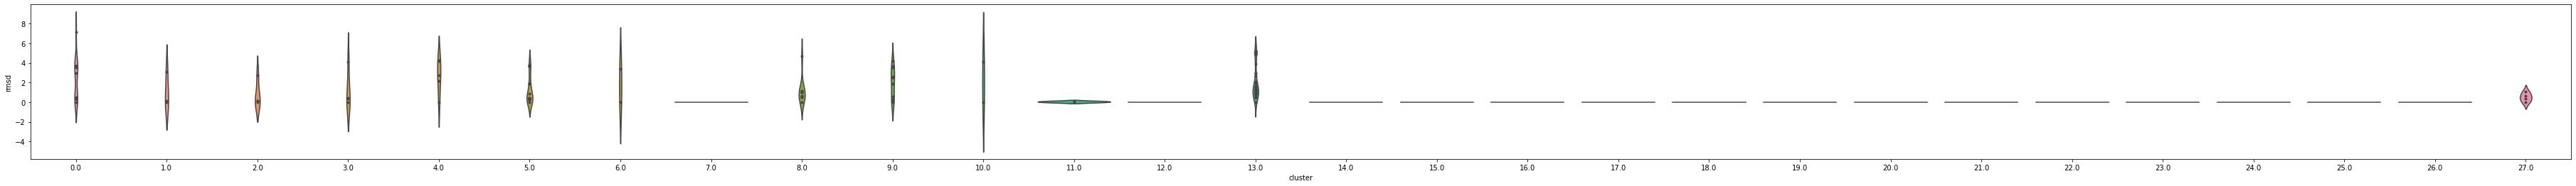

/Users/takabak/work/rna_bgsu/pdb/motif/cluster/triplebase/GUG


0   1   2   3    4   5    6   7   8   9    10   11   12  13  \
# of samples 19.0 7.0 2.0 7.0 57.0 7.0 15.0 2.0 6.0 4.0 10.0 15.0 15.0 2.0   
Avg           3.3 2.1 1.5 2.5  4.6 2.0  3.6 1.0 2.3 1.0  2.2  2.0  1.0 2.2   
Std           0.9 1.4 1.5 1.9  1.1 2.5  1.6 1.0 2.4 1.1  1.7  1.4  1.3 2.2   
Max           4.8 3.5 2.9 4.6  6.0 6.3  5.5 2.1 5.8 2.9  4.6  5.1  3.2 4.4   
Min           0.0 0.0 0.0 0.0  0.0 0.0  0.0 0.0 0.0 0.0  0.0  0.0  0.0 0.0   

              14  15  16  17  18  19  20  21  22  23  24  25  26  27  
# of samples 2.0 2.0 6.0 1.0 2.0 1.0 1.0 1.0 1.0 1.0 5.0 1.0 6.0 2.0  
Avg          2.7 2.3 2.2 0.0 2.0 0.0 0.0 0.0 0.0 0.0 1.3 0.0 0.2 0.5  
Std          2.7 2.3 1.8 0.0 2.0 0.0 0.0 0.0 0.0 0.0 1.4 0.0 0.1 0.5  
Max          5.4 4.7 4.7 0.0 4.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 0.3 1.0  
Min          0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0

<Figure size 432x288 with 0 Axes>

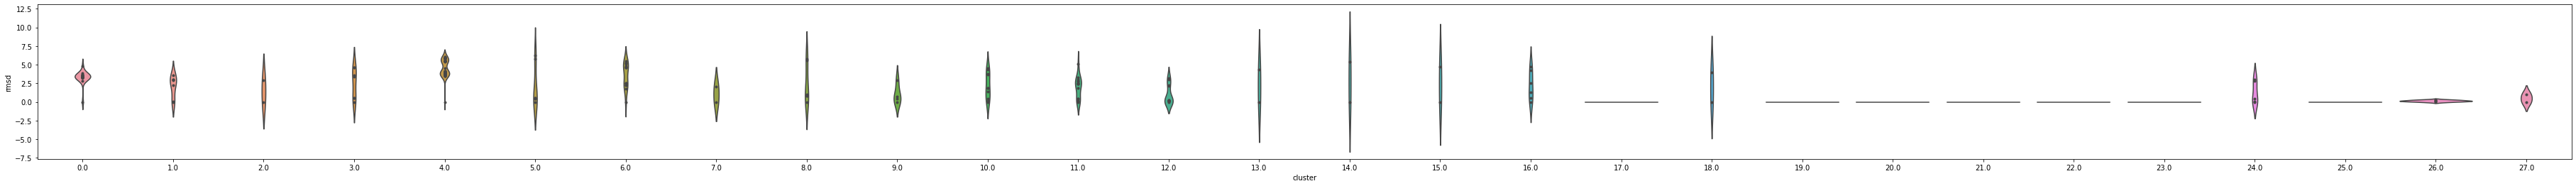

/Users/takabak/work/rna_bgsu/pdb/motif/cluster/triplebase/UGA


0   1    2   3   4   5   6    7   8   9    10  11  12  13  14  \
# of samples 3.0 8.0 27.0 3.0 2.0 3.0 5.0 25.0 4.0 5.0 51.0 2.0 2.0 7.0 7.0   
Avg          3.0 3.3  1.5 3.0 2.4 2.9 1.4  1.5 0.6 1.8  2.2 1.4 1.1 3.3 1.7   
Std          2.3 1.9  1.4 2.2 2.4 2.3 1.2  1.3 0.6 2.0  1.6 1.4 1.1 1.8 1.2   
Max          5.7 5.4  5.7 5.1 4.7 5.7 3.7  3.7 1.5 4.4  6.1 2.8 2.2 6.0 4.4   
Min          0.0 0.0  0.0 0.0 0.0 0.0 0.0  0.0 0.0 0.0  0.0 0.0 0.0 0.0 0.0   

              15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  \
# of samples 2.0 4.0 1.0 2.0 1.0 4.0 7.0 1.0 3.0 1.0 1.0 1.0 1.0 9.0 1.0 1.0   
Avg          1.3 1.0 0.0 1.7 0.0 1.8 3.3 0.0 0.3 0.0 0.0 0.0 0.0 1.5 0.0 0.0   
Std          1.3 1.2 0.0 1.7 0.0 1.8 1.5 0.0 0.2 0.0 0.0 0.0 0.0 1.7 0.0 0.0   
Max          2.6 3.1 0.0 3.4 0.0 4.0 4.7 0.0 0.5 0.0 0.0 0.0 0.0 3.9 0.0 0.0   
Min          0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0   

              31  32  33  34  35  36  37  
# of samples 1.0 1.0 1.0 5.0 1.0 1.0 9.0  
Avg          0.0 0.0 0.0 1.5 0.0 0.0 2.4  
Std          0.0 0.0 0.0 1.5 0.0 0.0 0.9  
Max          0.0 0.0 0.0 3.9 0.0 0.0 3.2  
Min          0.0 0.0 0.0 0.0 0.0 0.0 0.0

<Figure size 432x288 with 0 Axes>

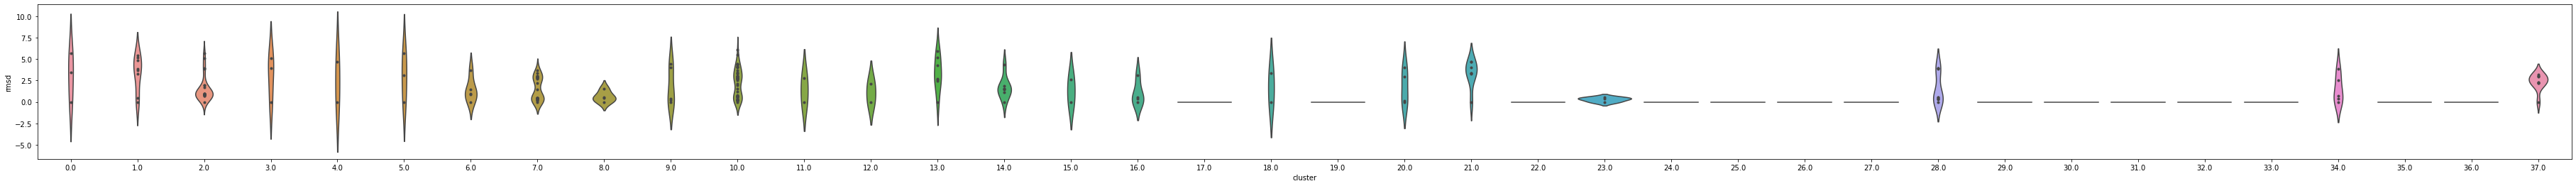

/Users/takabak/work/rna_bgsu/pdb/motif/cluster/triplebase/AUC


0   1   2   3   4    5    6   7   8   9    10   11  12  13  14  \
# of samples 3.0 3.0 2.0 8.0 5.0 11.0 14.0 3.0 4.0 3.0 15.0 43.0 1.0 1.0 1.0   
Avg          1.8 2.4 1.8 1.8 2.3  1.0  0.8 3.1 3.1 3.0  0.8  3.2 0.0 0.0 0.0   
Std          1.4 1.9 1.8 2.0 1.6  1.5  1.0 2.3 2.0 2.2  1.3  1.2 0.0 0.0 0.0   
Max          3.5 4.6 3.6 5.7 3.9  4.1  3.5 5.3 5.3 5.2  4.5  4.9 0.0 0.0 0.0   
Min          0.0 0.0 0.0 0.0 0.0  0.0  0.0 0.0 0.0 0.0  0.0  0.0 0.0 0.0 0.0   

              15  16  17   18  19  20  21  22  23  
# of samples 1.0 1.0 8.0 10.0 1.0 1.0 4.0 1.0 1.0  
Avg          0.0 0.0 1.1  3.1 0.0 0.0 1.4 0.0 0.0  
Std          0.0 0.0 1.4  1.4 0.0 0.0 1.9 0.0 0.0  
Max          0.0 0.0 3.6  5.6 0.0 0.0 4.6 0.0 0.0  
Min          0.0 0.0 0.0  0.0 0.0 0.0 0.0 0.0 0.0

<Figure size 432x288 with 0 Axes>

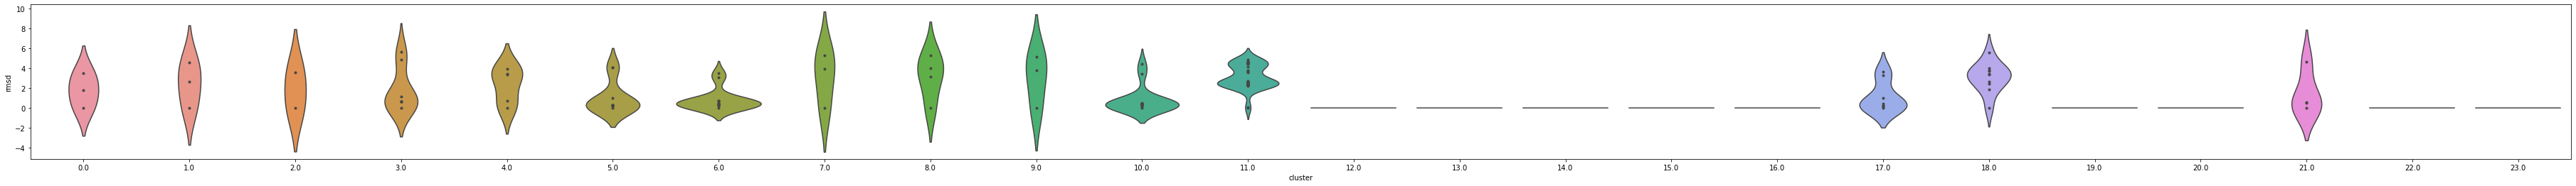

/Users/takabak/work/rna_bgsu/pdb/motif/cluster/triplebase/UGU


0   1    2   3   4    5   6   7   8   9   10  11  12  13  14  \
# of samples 3.0 3.0 25.0 3.0 2.0 18.0 3.0 2.0 1.0 4.0 2.0 3.0 5.0 1.0 1.0   
Avg          2.8 1.1  3.0 1.1 2.5  1.3 1.9 0.3 0.0 2.7 1.7 2.7 1.7 0.0 0.0   
Std          2.2 0.9  1.3 1.5 2.4  1.2 1.5 0.3 0.0 1.8 1.7 1.9 1.6 0.0 0.0   
Max          5.5 2.1  4.8 3.2 4.9  4.2 3.6 0.6 0.0 4.6 3.4 4.3 4.2 0.0 0.0   
Min          0.0 0.0  0.0 0.0 0.0  0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0   

              15  16  17  18  19   20  21  22  23  24  25  26  27  28  
# of samples 1.0 1.0 1.0 1.0 3.0 23.0 1.0 2.0 2.0 1.0 1.0 1.0 1.0 1.0  
Avg          0.0 0.0 0.0 0.0 2.4  1.9 0.0 0.8 1.8 0.0 0.0 0.0 0.0 0.0  
Std          0.0 0.0 0.0 0.0 1.7  2.2 0.0 0.8 1.8 0.0 0.0 0.0 0.0 0.0  
Max          0.0 0.0 0.0 0.0 3.9  5.4 0.0 1.7 3.5 0.0 0.0 0.0 0.0 0.0  
Min          0.0 0.0 0.0 0.0 0.0  0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0

<Figure size 432x288 with 0 Axes>

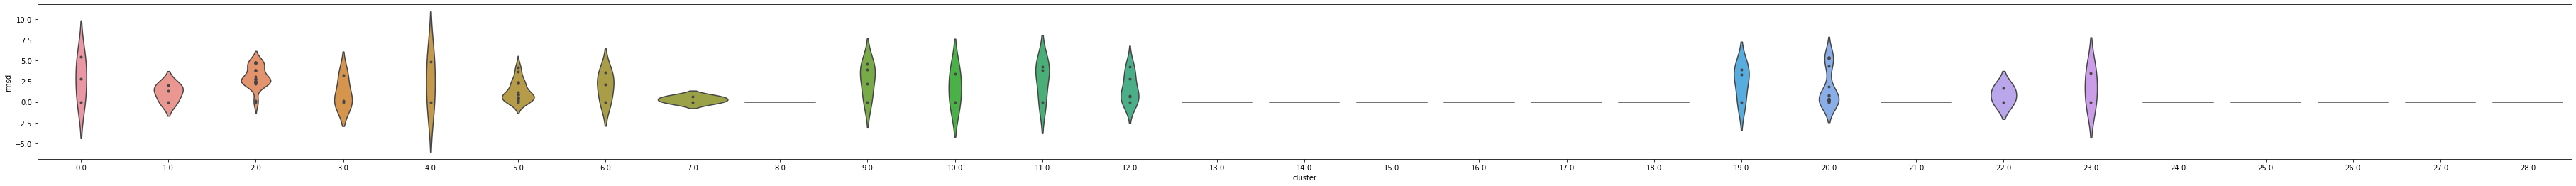

/Users/takabak/work/rna_bgsu/pdb/motif/cluster/triplebase/CUG


0   1    2    3   4   5   6   7   8   9   10  11  12  13  14  \
# of samples 23.0 3.0 13.0 41.0 4.0 6.0 5.0 2.0 3.0 1.0 1.0 3.0 3.0 1.0 3.0   
Avg           4.2 1.5  1.8  1.2 1.1 3.4 2.2 2.4 2.0 0.0 0.0 0.6 2.9 0.0 1.4   
Std           1.3 1.2  1.3  1.0 1.1 1.6 1.7 2.4 2.8 0.0 0.0 0.5 2.1 0.0 1.0   
Max           5.3 2.8  4.5  4.5 2.8 4.9 4.3 4.7 6.0 0.0 0.0 1.3 4.8 0.0 2.1   
Min           0.0 0.0  0.0  0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0   

              15  16  17  18  19  20  21  22  23  24  25  
# of samples 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 3.0 1.0  
Avg          0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.5 0.0  
Std          0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.9 0.0  
Max          0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 4.2 0.0  
Min          0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0

<Figure size 432x288 with 0 Axes>

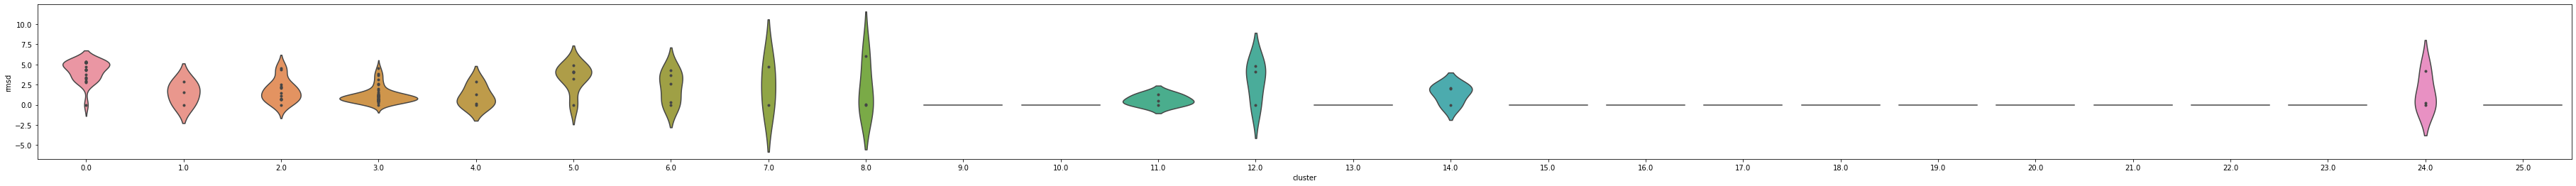

/Users/takabak/work/rna_bgsu/pdb/motif/cluster/triplebase/UGG


0   1   2   3   4   5   6   7   8   9   10  11  12   13  14  15  \
# of samples 2.0 5.0 4.0 5.0 8.0 5.0 5.0 9.0 5.0 1.0 9.0 3.0 1.0 39.0 9.0 1.0   
Avg          2.4 1.6 3.0 2.1 3.3 3.0 2.6 2.2 2.3 0.0 1.6 2.1 0.0  3.3 1.8 0.0   
Std          2.4 1.6 2.7 1.3 1.4 1.6 1.7 1.4 2.6 0.0 1.0 1.5 0.0  1.0 1.9 0.0   
Max          4.8 4.0 6.0 4.1 4.5 4.5 5.1 3.6 6.7 0.0 4.0 3.7 0.0  4.6 4.7 0.0   
Min          0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0  0.0 0.0 0.0   

              16  17  18  19  20  21  22  23  24  25  26  27  28  29  
# of samples 1.0 1.0 7.0 1.0 1.0 1.0 2.0 2.0 5.0 1.0 1.0 2.0 2.0 2.0  
Avg          0.0 0.0 1.5 0.0 0.0 0.0 2.0 1.0 0.4 0.0 0.0 0.1 0.3 2.5  
Std          0.0 0.0 1.2 0.0 0.0 0.0 2.0 1.0 0.3 0.0 0.0 0.1 0.3 2.5  
Max          0.0 0.0 3.1 0.0 0.0 0.0 4.0 2.0 0.8 0.0 0.0 0.1 0.6 5.0  
Min          0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0

<Figure size 432x288 with 0 Axes>

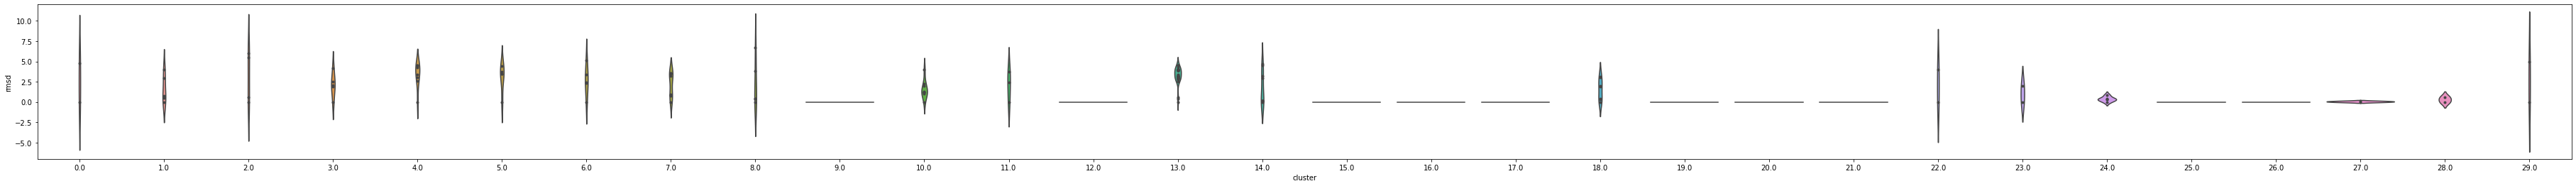

/Users/takabak/work/rna_bgsu/pdb/motif/cluster/triplebase/CUU


0   1   2   3    4   5   6   7   8   9    10  11  12  13  14  \
# of samples 8.0 3.0 7.0 4.0 23.0 4.0 4.0 2.0 3.0 1.0 28.0 2.0 1.0 1.0 6.0   
Avg          3.1 1.5 2.4 1.3  3.0 2.2 2.8 1.7 2.3 0.0  1.3 0.4 0.0 0.0 0.4   
Std          1.4 2.1 1.4 1.1  0.8 1.4 1.7 1.7 2.0 0.0  0.8 0.4 0.0 0.0 0.3   
Max          4.7 4.5 4.8 2.5  4.0 3.4 4.2 3.4 4.8 0.0  2.9 0.8 0.0 0.0 0.8   
Min          0.0 0.0 0.0 0.0  0.0 0.0 0.0 0.0 0.0 0.0  0.0 0.0 0.0 0.0 0.0   

               15  16  17  18  19  20  21  22  23  
# of samples 17.0 2.0 3.0 1.0 1.0 1.0 1.0 1.0 7.0  
Avg           1.1 0.1 0.6 0.0 0.0 0.0 0.0 0.0 0.8  
Std           0.7 0.1 0.8 0.0 0.0 0.0 0.0 0.0 0.4  
Max           3.1 0.1 1.7 0.0 0.0 0.0 0.0 0.0 1.4  
Min           0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0

<Figure size 432x288 with 0 Axes>

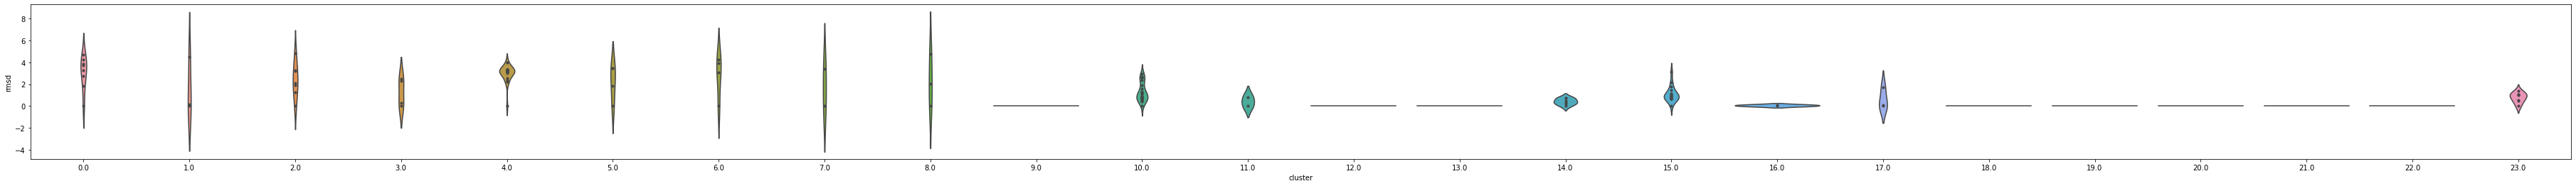

/Users/takabak/work/rna_bgsu/pdb/motif/cluster/triplebase/GUA


0   1   2   3   4    5   6    7   8    9   10  11  12  13   14  \
# of samples 3.0 5.0 3.0 2.0 3.0 42.0 5.0 10.0 3.0 11.0 2.0 4.0 8.0 3.0 39.0   
Avg          1.6 3.4 3.0 2.5 1.2  5.0 2.1  1.8 1.6  2.4 1.3 3.1 3.1 2.0  0.8   
Std          2.0 2.0 2.1 2.5 1.6  1.2 1.5  2.0 1.5  1.1 1.3 2.0 1.4 2.1  0.9   
Max          4.4 5.5 4.7 4.9 3.5  6.3 4.6  5.2 3.7  3.1 2.7 5.3 5.0 4.9  3.9   
Min          0.0 0.0 0.0 0.0 0.0  0.0 0.0  0.0 0.0  0.0 0.0 0.0 0.0 0.0  0.0   

              15  16  17  18  19  20  21  22  23  24  25  26  27   28  29  30  \
# of samples 6.0 2.0 4.0 1.0 4.0 1.0 1.0 1.0 3.0 7.0 1.0 2.0 1.0 25.0 1.0 1.0   
Avg          1.6 2.2 3.3 0.0 2.2 0.0 0.0 0.0 1.4 2.5 0.0 0.4 0.0  4.6 0.0 0.0   
Std          1.6 2.2 2.5 0.0 1.4 0.0 0.0 0.0 1.4 2.0 0.0 0.4 0.0  1.7 0.0 0.0   
Max          4.9 4.4 5.8 0.0 3.9 0.0 0.0 0.0 3.4 5.9 0.0 0.8 0.0  5.5 0.0 0.0   
Min          0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0  0.0 0.0 0.0   

              31  
# of samples 1.0  
Avg          0.0  
Std          0.0  
Max          0.0  
Min          0.0

<Figure size 432x288 with 0 Axes>

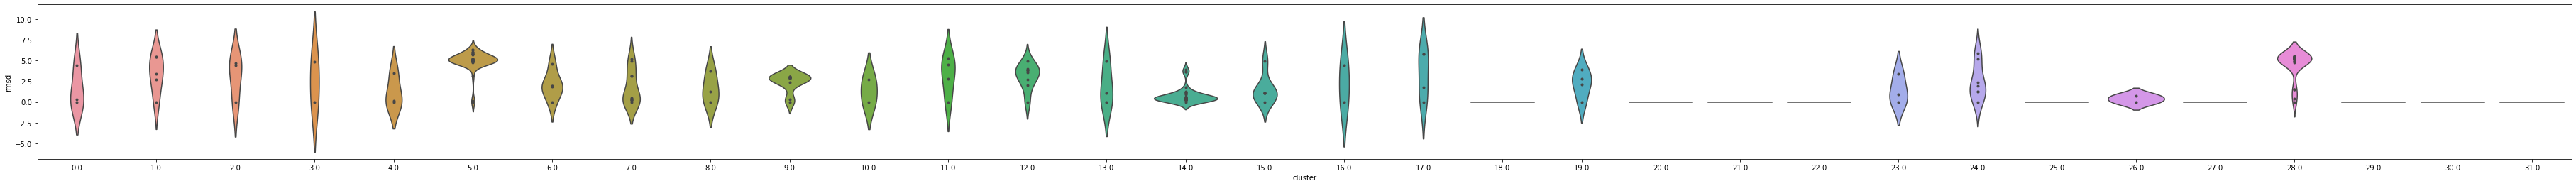

/Users/takabak/work/rna_bgsu/pdb/motif/cluster/triplebase/UCU


0   1   2   3   4   5   6   7    8   9   10  11  12   13  14  \
# of samples 2.0 3.0 5.0 5.0 2.0 1.0 4.0 2.0 16.0 2.0 6.0 1.0 1.0 16.0 1.0   
Avg          2.4 2.3 2.0 1.6 1.9 0.0 3.6 1.5  0.9 0.2 0.4 0.0 0.0  0.9 0.0   
Std          2.4 1.7 2.0 1.9 1.9 0.0 2.1 1.5  1.1 0.2 0.4 0.0 0.0  0.7 0.0   
Max          4.7 4.0 5.1 5.1 3.7 0.0 5.0 3.1  3.0 0.4 1.0 0.0 0.0  2.9 0.0   
Min          0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0  0.0 0.0 0.0 0.0 0.0  0.0 0.0   

              15  16  17  18  19  
# of samples 1.0 1.0 1.0 1.0 1.0  
Avg          0.0 0.0 0.0 0.0 0.0  
Std          0.0 0.0 0.0 0.0 0.0  
Max          0.0 0.0 0.0 0.0 0.0  
Min          0.0 0.0 0.0 0.0 0.0

<Figure size 432x288 with 0 Axes>

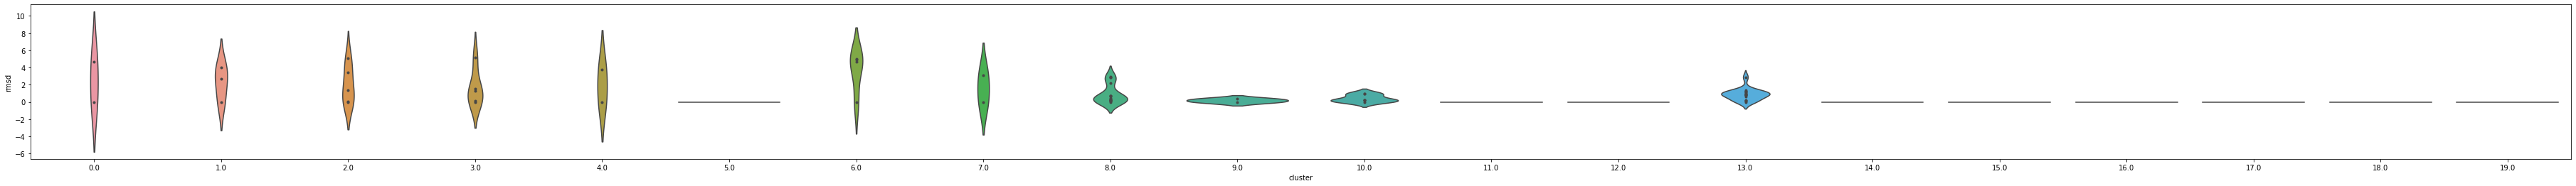

/Users/takabak/work/rna_bgsu/pdb/motif/cluster/triplebase/UCG


0   1   2   3   4    5   6   7    8    9   10  11   12  13  14  \
# of samples 2.0 2.0 6.0 3.0 7.0 23.0 8.0 4.0 48.0 12.0 2.0 4.0 40.0 2.0 2.0   
Avg          1.9 2.7 2.1 2.7 1.9  1.6 3.6 3.4  3.1  2.2 1.2 0.2  3.6 1.8 2.6   
Std          1.9 2.7 1.8 1.9 2.3  1.6 1.7 2.0  0.9  2.1 1.2 0.1  1.9 1.8 2.6   
Max          3.9 5.4 4.8 4.2 5.4  5.8 5.3 4.9  3.9  5.7 2.4 0.2  5.6 3.5 5.2   
Min          0.0 0.0 0.0 0.0 0.0  0.0 0.0 0.0  0.0  0.0 0.0 0.0  0.0 0.0 0.0   

              15  16  17  18  19  20  21  22  23  24  25  
# of samples 2.0 7.0 1.0 1.0 1.0 1.0 1.0 4.0 1.0 1.0 1.0  
Avg          0.1 0.4 0.0 0.0 0.0 0.0 0.0 0.3 0.0 0.0 0.0  
Std          0.1 0.3 0.0 0.0 0.0 0.0 0.0 0.2 0.0 0.0 0.0  
Max          0.2 0.8 0.0 0.0 0.0 0.0 0.0 0.6 0.0 0.0 0.0  
Min          0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0

<Figure size 432x288 with 0 Axes>

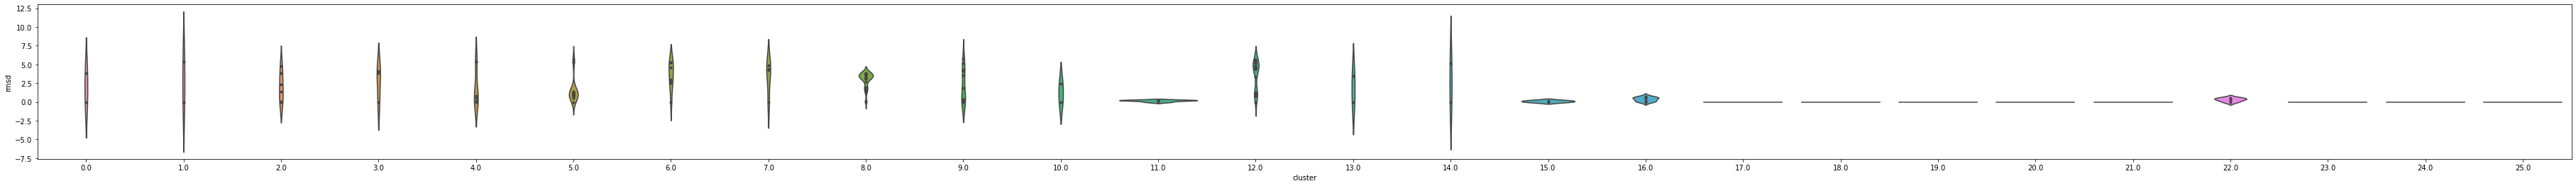

/Users/takabak/work/rna_bgsu/pdb/motif/cluster/triplebase/UCA


0   1    2   3   4   5    6   7    8   9   10  11  12  13  14  \
# of samples 5.0 2.0 18.0 8.0 2.0 5.0 13.0 5.0 11.0 4.0 3.0 3.0 2.0 8.0 1.0   
Avg          3.2 2.3  2.1 2.2 1.9 1.7  0.6 1.4  3.2 0.7 1.0 1.2 0.2 0.8 0.0   
Std          1.6 2.3  1.3 1.2 1.9 1.2  0.4 1.4  1.5 1.0 0.9 1.7 0.2 1.2 0.0   
Max          4.4 4.6  4.0 3.6 3.9 3.2  1.7 3.7  4.5 2.4 2.1 3.6 0.3 3.6 0.0   
Min          0.0 0.0  0.0 0.0 0.0 0.0  0.0 0.0  0.0 0.0 0.0 0.0 0.0 0.0 0.0   

              15  16  17  18  19  20  21  22  23  
# of samples 1.0 2.0 2.0 4.0 1.0 2.0 1.0 1.0 1.0  
Avg          0.0 2.1 2.2 1.7 0.0 1.7 0.0 0.0 0.0  
Std          0.0 2.1 2.2 1.0 0.0 1.7 0.0 0.0 0.0  
Max          0.0 4.3 4.3 2.7 0.0 3.4 0.0 0.0 0.0  
Min          0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0

<Figure size 432x288 with 0 Axes>

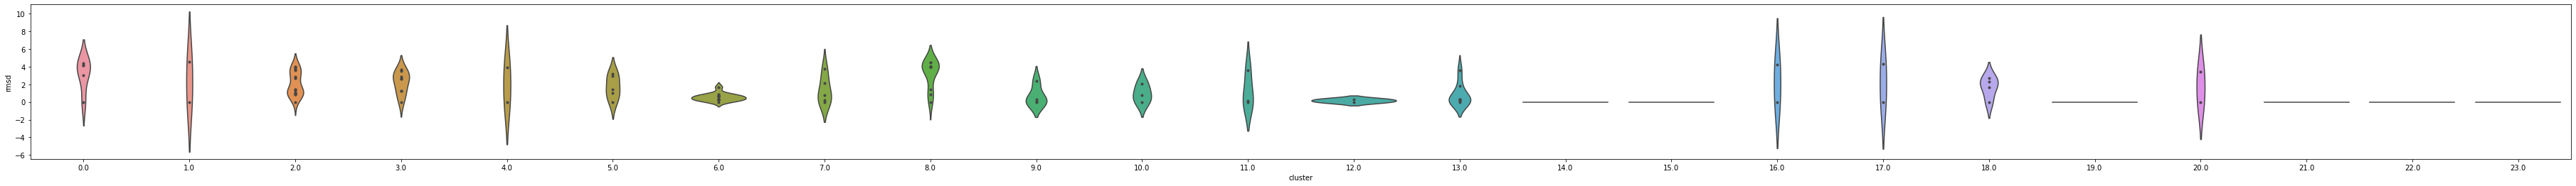

/Users/takabak/work/rna_bgsu/pdb/motif/cluster/triplebase/GCG


0   1   2    3     4   5    6   7   8   9   10   11  12  13  14  \
# of samples 4.0 2.0 6.0 47.0 189.0 2.0 14.0 2.0 2.0 9.0 2.0 15.0 4.0 1.0 1.0   
Avg          4.0 2.9 1.4  2.5   1.4 2.3  1.9 2.5 1.8 1.7 2.6  1.8 1.5 0.0 0.0   
Std          2.5 2.9 1.7  1.8   1.5 2.3  2.7 2.5 1.8 2.1 2.6  2.4 2.1 0.0 0.0   
Max          6.1 5.8 4.1  5.4   6.2 4.7  6.2 5.0 3.5 6.1 5.1  5.8 5.1 0.0 0.0   
Min          0.0 0.0 0.0  0.0   0.0 0.0  0.0 0.0 0.0 0.0 0.0  0.0 0.0 0.0 0.0   

               15  16  17  18  19  20  21   22  23   24  25  26  
# of samples 14.0 1.0 2.0 2.0 3.0 1.0 3.0 18.0 1.0 40.0 1.0 2.0  
Avg           0.5 0.0 2.1 2.4 1.1 0.0 2.9  4.5 0.0  1.4 0.0 1.5  
Std           0.3 0.0 2.1 2.4 1.0 0.0 2.4  2.4 0.0  1.5 0.0 1.5  
Max           0.8 0.0 4.2 4.8 2.4 0.0 5.8  6.0 0.0  6.0 0.0 3.0  
Min           0.0 0.0 0.0 0.0 0.0 0.0 0.0  0.0 0.0  0.0 0.0 0.0

<Figure size 432x288 with 0 Axes>

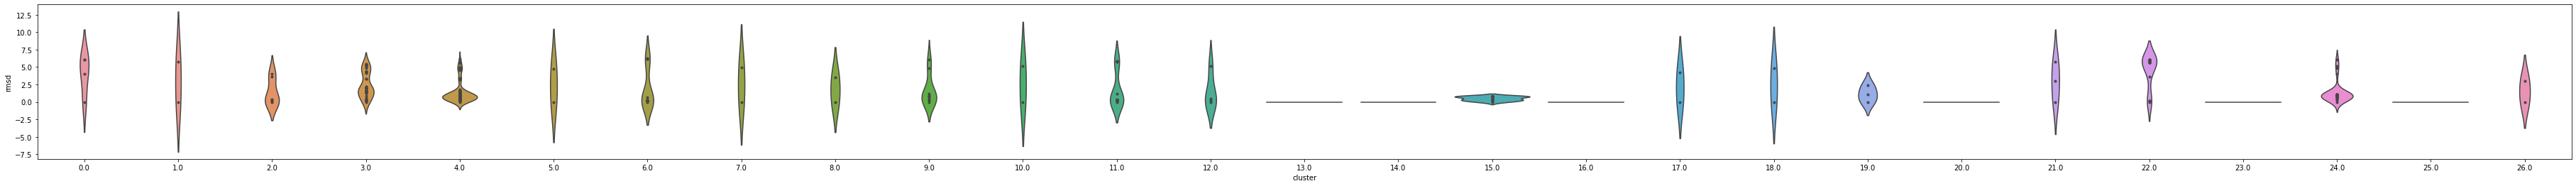

/Users/takabak/work/rna_bgsu/pdb/motif/cluster/triplebase/GCU


0    1   2   3   4   5    6   7   8   9   10  11  12  13  14  \
# of samples 5.0 53.0 2.0 2.0 4.0 2.0 16.0 1.0 5.0 2.0 2.0 2.0 1.0 2.0 1.0   
Avg          2.3  2.4 2.9 2.4 1.8 1.8  2.0 0.0 1.5 2.7 0.3 1.5 0.0 3.0 0.0   
Std          1.6  1.9 2.9 2.4 1.8 1.8  1.9 0.0 1.5 2.7 0.3 1.5 0.0 3.0 0.0   
Max          4.8  5.4 5.8 4.7 4.1 3.6  5.5 0.0 4.3 5.4 0.5 2.9 0.0 6.1 0.0   
Min          0.0  0.0 0.0 0.0 0.0 0.0  0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0   

              15  16  17  18  19   20  
# of samples 1.0 1.0 8.0 1.0 1.0 64.0  
Avg          0.0 0.0 0.6 0.0 0.0  1.3  
Std          0.0 0.0 1.4 0.0 0.0  1.2  
Max          0.0 0.0 4.2 0.0 0.0  6.0  
Min          0.0 0.0 0.0 0.0 0.0  0.0

<Figure size 432x288 with 0 Axes>

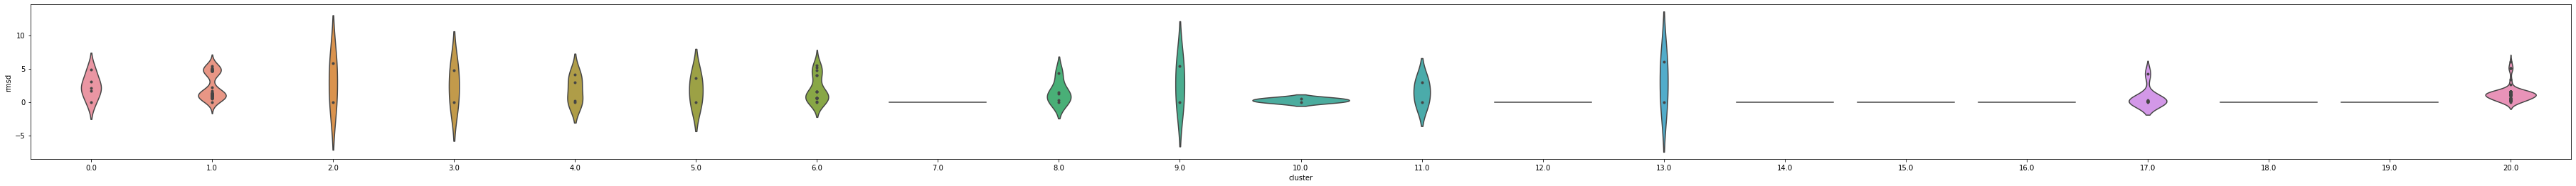

/Users/takabak/work/rna_bgsu/pdb/motif/cluster/triplebase/CCA


0   1    2   3   4   5    6   7   8   9   10  11  12  13  14  \
# of samples 17.0 5.0 17.0 5.0 2.0 2.0 14.0 2.0 2.0 2.0 1.0 1.0 1.0 1.0 1.0   
Avg           2.4 1.8  1.3 1.1 1.8 1.8  0.9 0.3 0.8 0.1 0.0 0.0 0.0 0.0 0.0   
Std           1.4 2.0  1.0 1.4 1.8 1.8  1.1 0.3 0.8 0.1 0.0 0.0 0.0 0.0 0.0   
Max           4.4 4.6  3.7 3.9 3.6 3.5  4.0 0.5 1.7 0.1 0.0 0.0 0.0 0.0 0.0   
Min           0.0 0.0  0.0 0.0 0.0 0.0  0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0   

              15  16  17  18  19  20  
# of samples 1.0 1.0 1.0 2.0 1.0 1.0  
Avg          0.0 0.0 0.0 0.1 0.0 0.0  
Std          0.0 0.0 0.0 0.1 0.0 0.0  
Max          0.0 0.0 0.0 0.1 0.0 0.0  
Min          0.0 0.0 0.0 0.0 0.0 0.0

<Figure size 432x288 with 0 Axes>

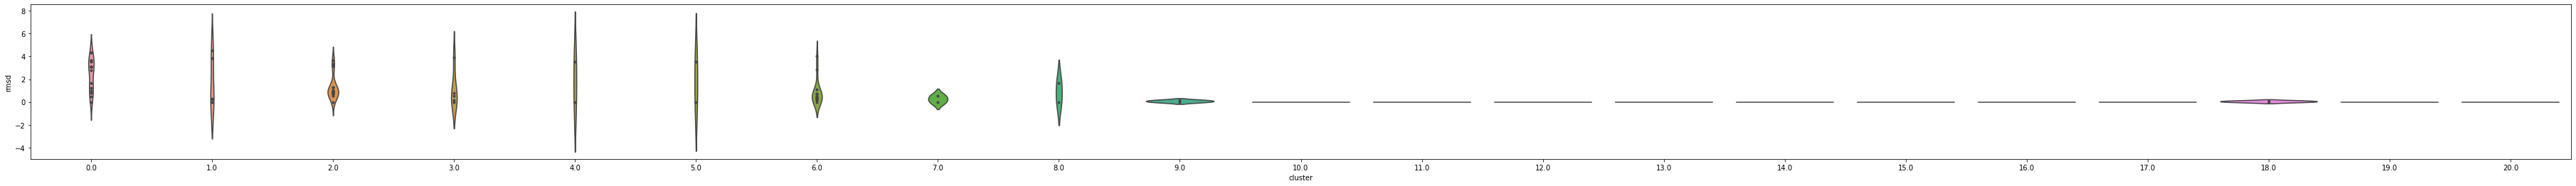

/Users/takabak/work/rna_bgsu/pdb/motif/cluster/triplebase/GCA


0    1   2   3   4    5   6   7   8   9   10  11  12  13  14  \
# of samples 3.0 62.0 8.0 6.0 3.0 92.0 7.0 8.0 1.0 3.0 5.0 9.0 6.0 1.0 1.0   
Avg          2.9  2.7 2.2 2.5 2.8  3.0 1.4 1.5 0.0 3.5 2.3 0.9 1.3 0.0 0.0   
Std          2.3  1.7 1.7 1.8 2.1  2.0 2.2 1.3 0.0 2.6 1.7 1.4 1.2 0.0 0.0   
Max          5.6  5.7 4.5 5.4 5.1  6.2 6.2 4.9 0.0 6.4 4.7 4.6 2.7 0.0 0.0   
Min          0.0  0.0 0.0 0.0 0.0  0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0   

              15  16  17  18  19  20  21   22  23  24  25  26  
# of samples 1.0 7.0 1.0 1.0 1.0 1.0 1.0 23.0 1.0 1.0 1.0 1.0  
Avg          0.0 3.4 0.0 0.0 0.0 0.0 0.0  1.9 0.0 0.0 0.0 0.0  
Std          0.0 2.0 0.0 0.0 0.0 0.0 0.0  2.0 0.0 0.0 0.0 0.0  
Max          0.0 5.8 0.0 0.0 0.0 0.0 0.0  5.7 0.0 0.0 0.0 0.0  
Min          0.0 0.0 0.0 0.0 0.0 0.0 0.0  0.0 0.0 0.0 0.0 0.0

<Figure size 432x288 with 0 Axes>

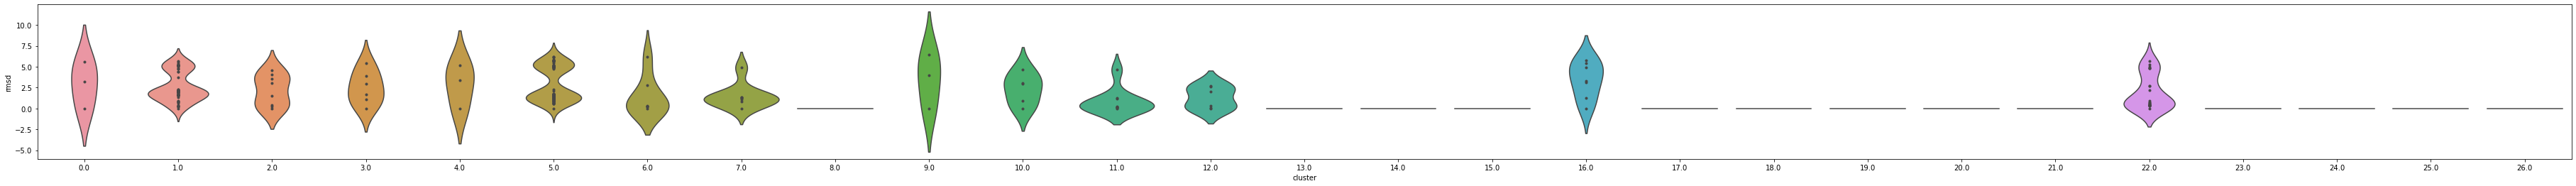

/Users/takabak/work/rna_bgsu/pdb/motif/cluster/triplebase/CCU


0    1    2   3   4   5   6   7   8   9   10  11  12  13  14  15
# of samples 3.0 10.0 41.0 2.0 2.0 1.0 2.0 2.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0
Avg          0.7  2.2  1.4 1.4 1.2 0.0 0.1 1.2 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
Std          0.5  1.1  0.8 1.4 1.2 0.0 0.1 1.2 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
Max          1.2  4.1  3.6 2.9 2.4 0.0 0.1 2.5 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
Min          0.0  0.0  0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0

<Figure size 432x288 with 0 Axes>

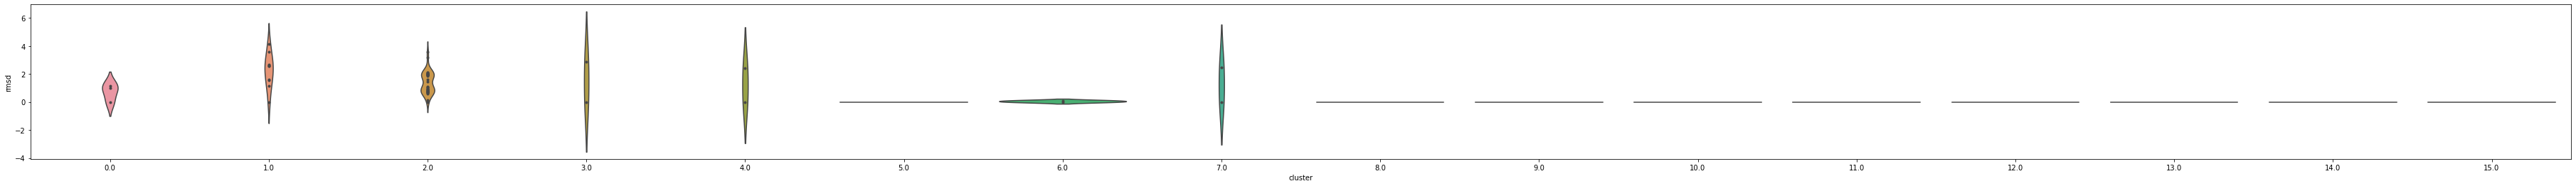

/Users/takabak/work/rna_bgsu/pdb/motif/cluster/triplebase/CCG


0   1    2    3   4   5    6   7   8   9   10  11  12  13  14  \
# of samples 2.0 2.0 44.0 32.0 2.0 2.0 15.0 4.0 3.0 7.0 1.0 1.0 4.0 3.0 1.0   
Avg          2.8 1.5  1.3  2.0 1.0 2.1  4.0 2.7 1.2 1.5 0.0 0.0 0.2 0.2 0.0   
Std          2.8 1.5  1.3  1.6 1.0 2.1  1.7 2.6 1.7 2.0 0.0 0.0 0.1 0.2 0.0   
Max          5.6 3.0  4.9  4.6 2.0 4.2  5.3 5.4 3.6 4.7 0.0 0.0 0.4 0.3 0.0   
Min          0.0 0.0  0.0  0.0 0.0 0.0  0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0   

              15  16  17  18  19  20  
# of samples 1.0 1.0 1.0 9.0 1.0 3.0  
Avg          0.0 0.0 0.0 1.3 0.0 1.7  
Std          0.0 0.0 0.0 1.6 0.0 2.3  
Max          0.0 0.0 0.0 5.0 0.0 5.0  
Min          0.0 0.0 0.0 0.0 0.0 0.0

<Figure size 432x288 with 0 Axes>

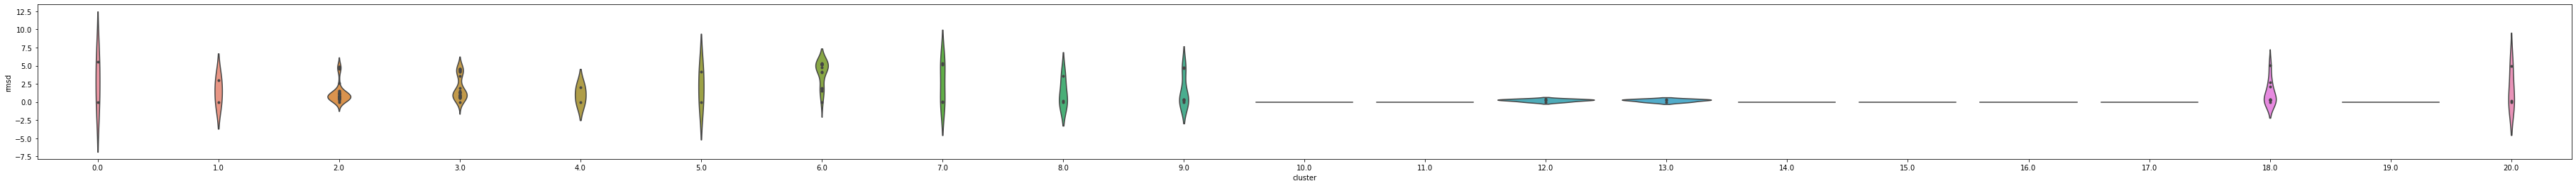

/Users/takabak/work/rna_bgsu/pdb/motif/cluster/triplebase/ACC


0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  \
# of samples 4.0 8.0 4.0 2.0 1.0 1.0 2.0 3.0 2.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0   
Avg          1.8 1.9 1.0 1.7 0.0 0.0 1.8 1.3 2.4 0.0 0.0 0.0 0.0 0.0 0.0 0.0   
Std          1.1 1.3 0.9 1.7 0.0 0.0 1.8 1.7 2.4 0.0 0.0 0.0 0.0 0.0 0.0 0.0   
Max          2.8 4.9 2.5 3.3 0.0 0.0 3.7 3.7 4.7 0.0 0.0 0.0 0.0 0.0 0.0 0.0   
Min          0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0   

              16  17   18  
# of samples 1.0 3.0 77.0  
Avg          0.0 1.3  1.0  
Std          0.0 0.9  0.5  
Max          0.0 1.9  4.0  
Min          0.0 0.0  0.0

<Figure size 432x288 with 0 Axes>

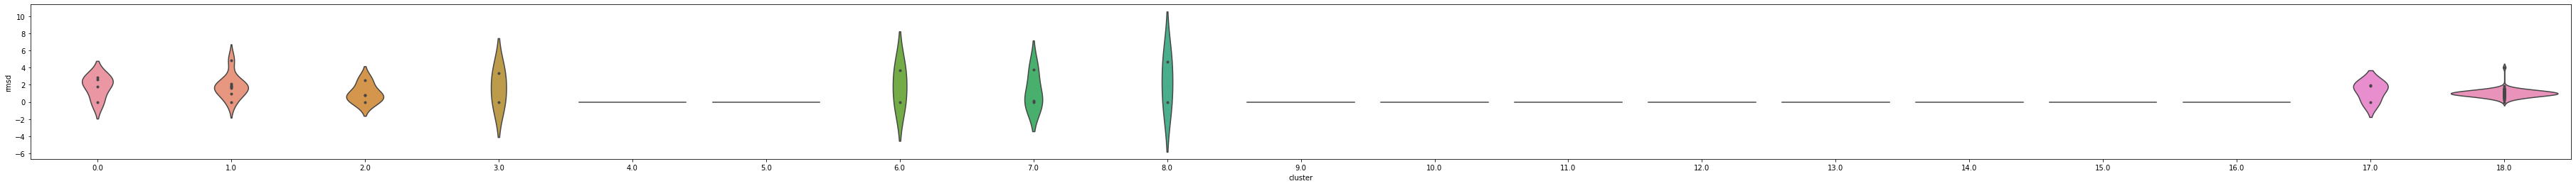

In [11]:
for seq in seqs:
    s = os.path.basename(seq)
    #print(s)
    
    cluster_path = os.path.join(triplebase_path, s)
    ncls = len(glob.glob(cluster_path + "/cluster_*"))
    
    mydict = {}
    c_id, c_num, r_avg, r_std, r_max, r_min = [], [], [], [], [], []
    arr = []
    for i in range(ncls):
        rmsdfile = os.path.join(cluster_path, "cluster_{}".format(i), "rmsd.dat")
        
        r = []
        with open(rmsdfile, "r") as f:
            for l in f.readlines()[1:]:
                v = l.split('\t')[0]
                if v != 0:
                    r.append(float(v))
                    arr.append([i, v])
        
        c_id.append(i)
        c_num.append(len(r))
        
        r = np.array(r)
        r_avg.append(np.mean(r))
        r_std.append(np.std(r))
        r_max.append(np.max(r))
        r_min.append(np.min(r))
        
    mydict = {"# of samples": c_num, "Avg": r_avg, "Std": r_std, "Max": r_max, "Min": r_min}
    
    df = pd.DataFrame.from_dict(mydict, dtype=float)
    print("{}".format(seq))
    display(df.T)
    
    
    df = pd.DataFrame(arr, columns=["cluster", "rmsd"], dtype=float)
    df_select = df.query( 'cluster<100' )
    plt.clf()
    fig, ax = plt.subplots(figsize=(64,4))
    ax = sns.violinplot(data=df_select, inner="points", x="cluster", y ='rmsd')
    plt.show()